In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Getting the train data

In [2]:
df_train = pd.read_csv("house/train.csv")

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_train.shape

(1460, 81)

### Getting the test data

In [5]:
df_test = pd.read_csv("house/test.csv")

In [6]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [7]:
df_test.shape

(1459, 80)

### Appending the two data sets¶

In [8]:
df_whole = df_train.append(df_test)

In [9]:
df_whole.shape

(2919, 81)

# 1. Data exploration¶

In [10]:
df_whole.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

### What does it means our data?
##### SalePrice : the property's sale price in dollars. 
##### MSSubClass: The building class
##### MSZoning: The general zoning classification
##### LotFrontage: Linear feet of street connected to property
##### LotArea: Lot size in square feet
##### Street: Type of road access
##### Alley: Type of alley access
##### LotShape: General shape of property
##### LandContour: Flatness of the property
##### Utilities: Type of utilities available
##### LotConfig: Lot configuration
##### LandSlope: Slope of property
##### Neighborhood: Physical locations within Ames city limits
##### Condition1: Proximity to main road or railroad
##### Condition2: Proximity to main road or railroad (if a second is present)
##### BldgType: Type of dwelling
##### HouseStyle: Style of dwelling
##### OverallQual: Overall material and finish quality
##### OverallCond: Overall condition rating
##### YearBuilt: Original construction date
##### YearRemodAdd: Remodel date
##### RoofStyle: Type of roof
##### RoofMatl: Roof material
##### Exterior1st: Exterior covering on house
##### Exterior2nd: Exterior covering on house (if more than one material)
##### MasVnrType: Masonry veneer type
##### MasVnrArea: Masonry veneer area in square feet
##### ExterQual: Exterior material quality
##### ExterCond: Present condition of the material on the exterior
##### Foundation: Type of foundation
##### BsmtQual: Height of the basement
##### BsmtCond: General condition of the basement
##### BsmtExposure: Walkout or garden level basement walls
##### BsmtFinType1: Quality of basement finished area
##### BsmtFinSF1: Type 1 finished square feet
##### BsmtFinType2: Quality of second finished area (if present)
##### BsmtFinSF2: Type 2 finished square feet
##### BsmtUnfSF: Unfinished square feet of basement area
##### TotalBsmtSF: Total square feet of basement area
##### Heating: Type of heating
##### HeatingQC: Heating quality and condition
##### CentralAir: Central air conditioning
##### Electrical: Electrical system
##### 1stFlrSF: First Floor square feet
##### 2ndFlrSF: Second floor square feet
##### LowQualFinSF: Low quality finished square feet (all floors)
##### GrLivArea: Above grade (ground) living area square feet
##### BsmtFullBath: Basement full bathrooms
##### BsmtHalfBath: Basement half bathrooms
##### FullBath: Full bathrooms above grade
##### HalfBath: Half baths above grade
###### Bedroom: Number of bedrooms above basement level
##### Kitchen: Number of kitchens
##### KitchenQual: Kitchen quality
##### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##### Functional: Home functionality rating
##### Fireplaces: Number of fireplaces
##### FireplaceQu: Fireplace quality
##### GarageType: Garage location
##### GarageYrBlt: Year garage was built
##### GarageFinish: Interior finish of the garage
##### GarageCars: Size of garage in car capacity
##### GarageArea: Size of garage in square feet
##### GarageQual: Garage quality
##### GarageCond: Garage condition
##### PavedDrive: Paved driveway
##### WoodDeckSF: Wood deck area in square feet
##### OpenPorchSF: Open porch area in square feet
##### EnclosedPorch: Enclosed porch area in square feet
##### 3SsnPorch: Three season porch area in square feet
##### ScreenPorch: Screen porch area in square feet
##### PoolArea: Pool area in square feet
##### PoolQC: Pool quality
##### Fence: Fence quality
##### MiscFeature: Miscellaneous feature not covered in other categories
##### MiscVal: Value of miscellaneous feature
##### MoSold: Month Sold
##### YrSold: Year Sold
##### SaleType: Type of sale
##### SaleCondition: Condition of sale

In [11]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Let see if there is any correlation between the different columns

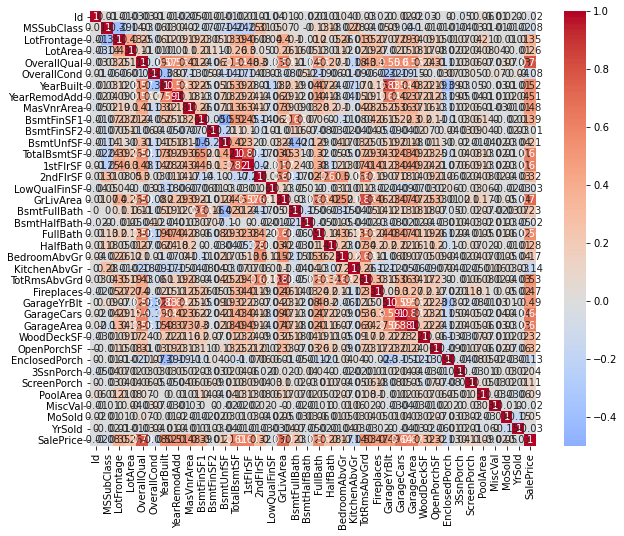

In [12]:
correlation_matrix = df_train.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

### If we look at the last row which correspond to the SalePrice parameter we see that there is many other parameters that seems to have a strong relation. 

# 2. Cleaning data

### Let's see how many missing values do we have

In [13]:
for col in df_whole.columns:
    if df_whole[col].isnull().sum() != 0:
        print(col + ' has ', df_whole[col].isnull().sum(), ' missing values ')

MSZoning has  4  missing values 
LotFrontage has  486  missing values 
Alley has  2721  missing values 
Utilities has  2  missing values 
Exterior1st has  1  missing values 
Exterior2nd has  1  missing values 
MasVnrType has  24  missing values 
MasVnrArea has  23  missing values 
BsmtQual has  81  missing values 
BsmtCond has  82  missing values 
BsmtExposure has  82  missing values 
BsmtFinType1 has  79  missing values 
BsmtFinSF1 has  1  missing values 
BsmtFinType2 has  80  missing values 
BsmtFinSF2 has  1  missing values 
BsmtUnfSF has  1  missing values 
TotalBsmtSF has  1  missing values 
Electrical has  1  missing values 
BsmtFullBath has  2  missing values 
BsmtHalfBath has  2  missing values 
KitchenQual has  1  missing values 
Functional has  2  missing values 
FireplaceQu has  1420  missing values 
GarageType has  157  missing values 
GarageYrBlt has  159  missing values 
GarageFinish has  159  missing values 
GarageCars has  1  missing values 
GarageArea has  1  missing v

### First, the shape of our data frame is

In [14]:
df_whole.shape

(2919, 81)

### If we compare the total number of the whole data frame with the null values, we can see that there are two four parameters which most of the values are missing, this are Alley, PoolQC, Fence and MiscFeature. These parameters have more that 2000 missing values, which is a huge amount of data missing, normally it is good to erase these data, but let's see first is there is any reason why there is this huge amount. So let's check first how is the relation between these and the parameter that we are interested in, i.e., Sale Price

### Before any modification let's make a copy of the original data

In [15]:
df_whole_new = df_whole.copy() 

### 2.1 Alley

### Let's see the relation between the Alley and the Sale Price

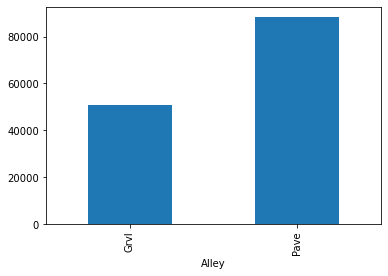

In [16]:
df_whole_new.groupby('Alley')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### Remember that the parameter alley only tell us the type of alley access, and maybe NA only means that the house does not have alley, so we will replace the missing values in this by No Alley

In [17]:
df_whole_new['Alley'].fillna('No Alley', inplace=True)

### Let's see how the relationship changed

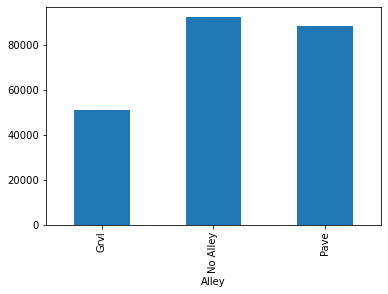

In [18]:
df_whole_new.groupby('Alley')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### 2.2 PoolQC

### Let's see the relation between the PoolQC and the Sale Price

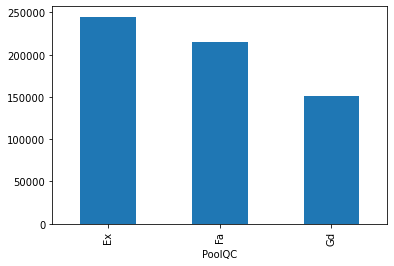

In [19]:
df_whole_new.groupby('PoolQC')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

 ### We can think that the missing values only means that there is not a Pool, we can corrroborate this by checking the parameter PoolArea which tell us the Pool area in square feet, if this is zero, means that there is not a pool. Plus if the number of houses that does not have a Pool matches with the number of missing values in PoolQc (2909), therefore we are rigth.

In [20]:
df_pool = df_whole_new[df_whole_new['PoolArea'] == 0]

In [21]:
df_pool.shape

(2906, 81)

### Remember that the parameter PoolQC means the Pool quality, so here as well the null values means that this house does not have pool, so we will change NA by No Pool

In [22]:
df_whole_new['PoolQC'].fillna('No Pool', inplace=True) 

### Let's see how the relationship changed

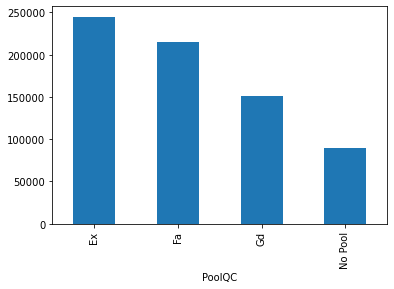

In [23]:
df_whole_new.groupby('PoolQC')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### 2.3 Fence

### Let's see the relation between the Fence and the Sale Price

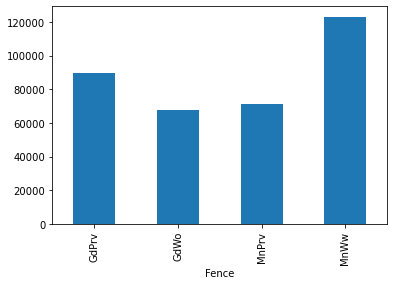

In [24]:
df_whole_new.groupby('Fence')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### Here again the parameter Fence means Fence quality, so here as well the null values means that this house does not have a fence, so we will change NA by No Fence

In [25]:
df_whole_new['Fence'].fillna('No Fence', inplace=True) 

### Let's see how the relationship changed

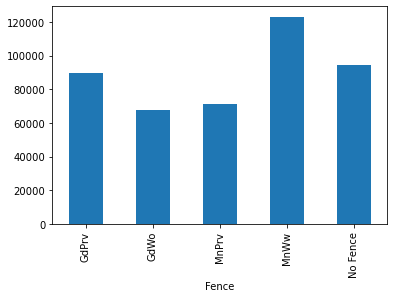

In [26]:
df_whole_new.groupby('Fence')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### 2.4 MiscFeature

### Let's see the relation between the MiscFeature and the Sale Price

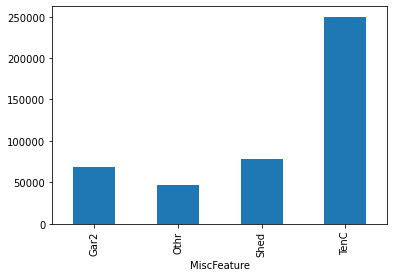

In [27]:
df_whole_new.groupby('MiscFeature')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### This parameter MiscFeature means Miscellaneous feature not covered in other categories, here we can make the same analogy since NA can means that these houses did not have any other special feature

In [28]:
df_whole_new['MiscFeature'].fillna('No SpFeature', inplace=True) 

### Let's see how the relation is now

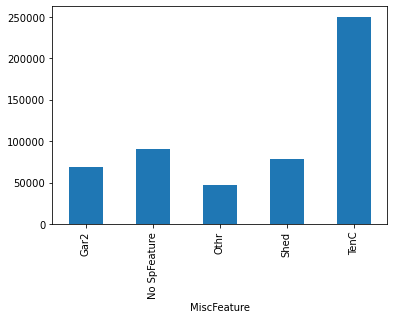

In [29]:
df_whole_new.groupby('MiscFeature')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### The next parameter that has a considerable amount of missing values is FireplaceQu, so let's take a look at it  

### 2.5 FirePlaceQu

### Let's see the relation between the FireplaceQu and the Sale Price

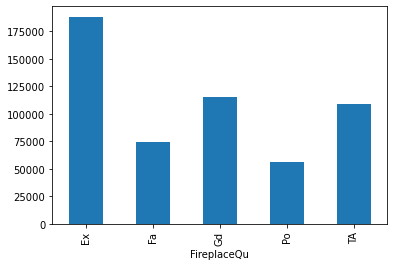

In [30]:
df_whole_new.groupby('FireplaceQu')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We know that the parameter FireplaceQu means the Fireplace quality, therefore NaN is this case can mean that there is not a Fireplace, we can corroborate if this is true by checking the paramete Fireplaces, which indicates the number of fireplaces, if the number of houses that does not have fireplaces correspond to the number of missing values in FireplaceQu (1420)

In [31]:
df_fireplace = df_whole_new[df_whole_new['Fireplaces'] == 0]

In [32]:
df_fireplace.shape

(1420, 81)

### Since is true we will replace the NaN by No Fireplaces

In [33]:
df_whole_new['FireplaceQu'].fillna('No Fireplaces', inplace=True)

### Let's see how the relation changed

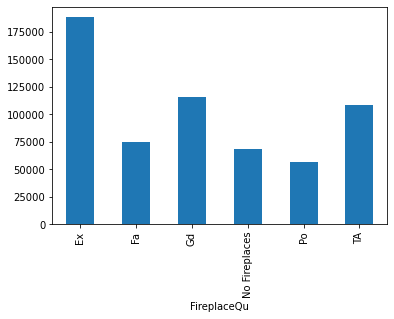

In [34]:
df_whole_new.groupby('FireplaceQu')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### The following parameter with more missing values is LotFrontage

### 2.6 LotFrontage

Text(0.5, 1.0, 'LotFrontage histogram')

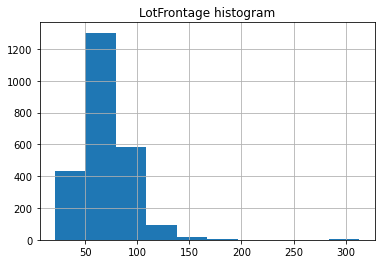

In [35]:
df_whole_new['LotFrontage'].hist().set_title('LotFrontage histogram')

### Remember that the parameter LotFrontage indicate the Linear feet of street connected to property

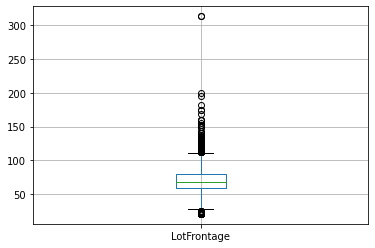

In [36]:
df_whole_new.boxplot(column=['LotFrontage'])

### This parameter has a lot of outliers, but the meadim is aroung 68

In [37]:
median = df_whole_new['LotFrontage'].median()

### We will fill the missing values with the median

In [38]:
df_whole_new['LotFrontage'].fillna(median,inplace=True)

### Next parameters that has missing values are the ones related to the Garage, i.e. GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, the first one has 157 missing values and the others has 159 equally, let's see if there is a relation. 

### 2.7 Garage

##### Remember that:
##### GarageType: Garage location
##### GarageYrBlt: Year garage was built
##### GarageFinish: Interior finish of the garage
##### GarageCars: Size of garage in car capacity
##### GarageArea: Size of garage in square feet
##### GarageQual: Garage quality
##### GarageCond: Garage condition

### First let's see if there is a relation between the number of missing value sfor GarageType and the Garage Area, since the latest give us the size of garage in square feet, we will check if the number values that correspond to zero square feet are eaul to the missing values in GarageType. Therefor ethis will means that the missing value scorrespong to the case where is no Garage in the house.

In [39]:
df_garage = df_whole_new[df_whole_new['GarageArea'] == 0]

In [40]:
df_garage.shape

(157, 81)

### Indeed is the same number, and since the other missing values in the others Garage features are close to 157, we will replace as well their Nan by NoGarage

In [41]:
df_whole_new['GarageType'].fillna('No Garage', inplace=True) 
df_whole_new['GarageFinish'].fillna('No Garage', inplace=True) 
df_whole_new['GarageQual'].fillna('No Garage', inplace=True) 
df_whole_new['GarageCond'].fillna('No Garage', inplace=True) 

### Let's see how is the relation between these parameters and SalePrice

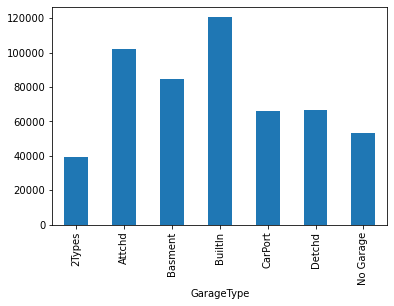

In [42]:
df_whole_new.groupby('GarageType')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

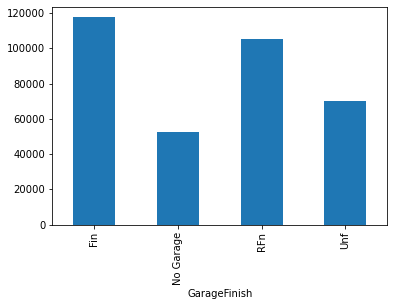

In [43]:
df_whole_new.groupby('GarageFinish')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

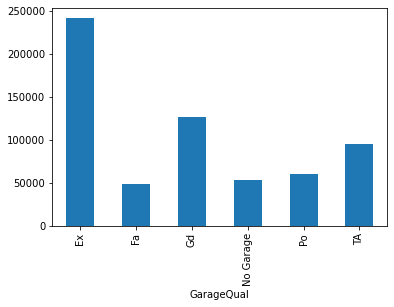

In [44]:
df_whole_new.groupby('GarageQual')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

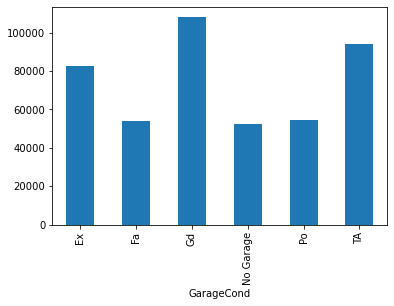

In [45]:
df_whole_new.groupby('GarageCond')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### For the year of garage

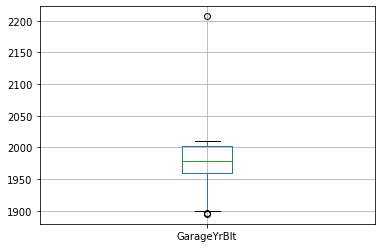

In [46]:
df_whole_new.boxplot(column=['GarageYrBlt'])

In [47]:
mean_garage = df_whole_new['GarageYrBlt'].mean()

In [48]:
df_whole_new['GarageYrBlt'].fillna(1978, inplace=True) 

### The following missing values are found in the parameters that are relate to the bassement

### 2.7 Bassement

##### BsmtQual: Height of the basement  with 81 missing values
##### BsmtCond: General condition of the basement  with 82 missing values
##### BsmtExposure: Walkout or garden level basement walls  with 82 missing values
##### BsmtFinType1: Quality of basement finished area  with 79 missing values
##### BsmtFinType2: Quality of second finished area (if present) with 80 missing values

### Again we can check if these missing values are not related to the lack of bassement in the house, and we will do it by using the parameter TotalBsmtSF which tell us the total square feet of basement area

In [49]:
df_bassement = df_whole_new[df_whole_new['TotalBsmtSF'] == 0]

In [50]:
df_bassement.shape

(78, 81)

### Althougth we only have 78 houses without basement, if we change the NaN values by No Basement in all the Basement parameters that has missing values, we will only have maximum 4 houses that could be missplaced which will not affect much the model

In [51]:
df_whole_new['BsmtQual'].fillna('No Basement', inplace=True) 
df_whole_new['BsmtCond'].fillna('No Basement', inplace=True) 
df_whole_new['BsmtExposure'].fillna('No Basement', inplace=True) 
df_whole_new['BsmtFinType1'].fillna('No Basement', inplace=True) 
df_whole_new['BsmtFinType2'].fillna('No Basement', inplace=True) 

### Let's see how is the relation between these parameters and SalePrice

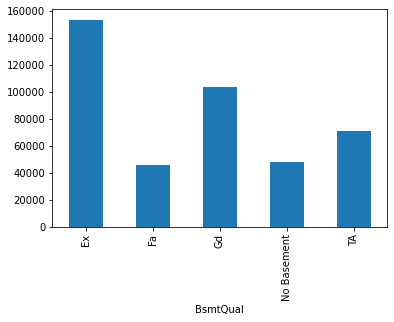

In [52]:
df_whole_new.groupby('BsmtQual')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

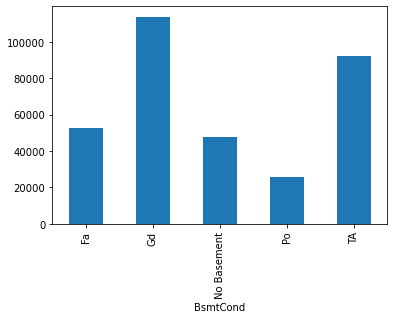

In [53]:
df_whole_new.groupby('BsmtCond')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

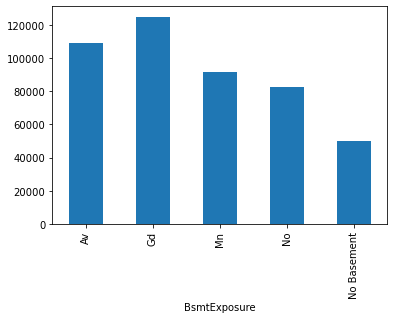

In [54]:
df_whole_new.groupby('BsmtExposure')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

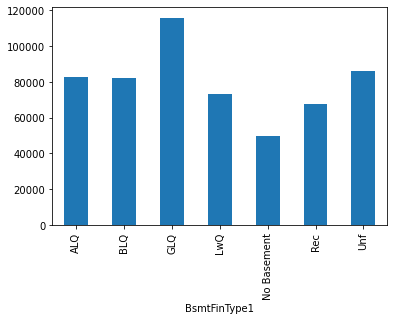

In [55]:
df_whole_new.groupby('BsmtFinType1')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

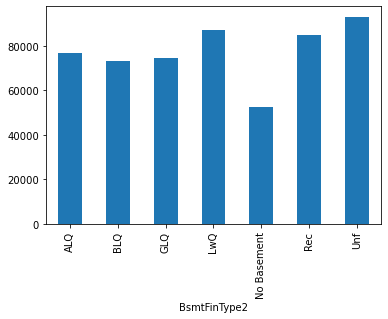

In [56]:
df_whole_new.groupby('BsmtFinType2')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### The other missing values correspond to the feature MasVnrType and MasVnrArea

### 2.8  MasVnr

##### MasVnrType: Masonry veneer type has 24 missing values
##### MasVnrArea: Masonry veneer area in square feet has 23 missing values

### Let's see if the missing values has anything to se with the no existences of the Masonry 

In [57]:
df_bassement = df_whole_new[df_whole_new['MasVnrArea'] == 0]

In [58]:
df_bassement.shape

(1738, 81)

### We only have 23 missing values, so is not, let see how is the distribution of the masonry veneer type related to the sales price

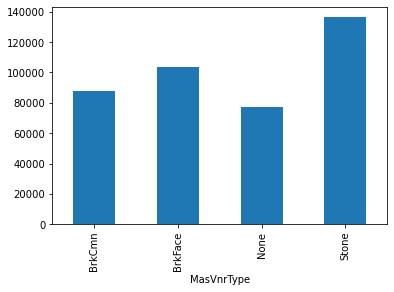

In [59]:
df_whole_new.groupby('MasVnrType')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### Let's check how is the distribution for the area of the masonry veneer

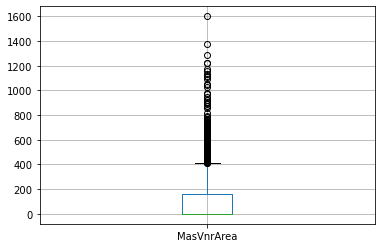

In [60]:
df_whole_new.boxplot(column=['MasVnrArea'])

In [61]:
df_whole_new['MasVnrArea'].mean()

102.20131215469613

### Seems that there is a lot of outliers, therefore instead of filling the missing values with the media it is better to take them as the people who provide the information ommits to fill these because they were not masonty veneer. Therefor as the number fo missing values for the two features are close (23 and 24) we will fill the infomatio accordingly 

In [62]:
df_whole_new['MasVnrArea'].fillna(0, inplace=True) 
df_whole_new['MasVnrType'].fillna('None', inplace=True) 

### Let's check how many features with missing values there are left

In [63]:
for col in df_whole_new.columns:
    if df_whole_new[col].isnull().sum() != 0:
        print(col + ' has ', df_whole_new[col].isnull().sum(), ' missing values and is ',  df_whole_new[col].dtype)

MSZoning has  4  missing values and is  object
Utilities has  2  missing values and is  object
Exterior1st has  1  missing values and is  object
Exterior2nd has  1  missing values and is  object
BsmtFinSF1 has  1  missing values and is  float64
BsmtFinSF2 has  1  missing values and is  float64
BsmtUnfSF has  1  missing values and is  float64
TotalBsmtSF has  1  missing values and is  float64
Electrical has  1  missing values and is  object
BsmtFullBath has  2  missing values and is  float64
BsmtHalfBath has  2  missing values and is  float64
KitchenQual has  1  missing values and is  object
Functional has  2  missing values and is  object
GarageCars has  1  missing values and is  float64
GarageArea has  1  missing values and is  float64
SaleType has  1  missing values and is  object
SalePrice has  1459  missing values and is  float64


### As these features has maximum 4 missing values out of 2919 we will fill the data with the corresponding media value in each case for the cases where the feature is float64

### 2.9  Missing Values float64

In [64]:
for col in df_whole_new.columns:
    if col != 'SalePrice':
        if df_whole_new[col].dtypes!='O':
            if df_whole_new[col].isnull().sum() != 0:
                median = df_whole_new[col].median()
                df_whole_new[col].fillna(median,inplace=True)
            

### Let's check again the missing values

In [65]:
for col in df_whole_new.columns:
    if df_whole_new[col].isnull().sum() != 0:
        print(col + ' has ', df_whole_new[col].isnull().sum(), ' missing values and is ',  df_whole_new[col].dtype)

MSZoning has  4  missing values and is  object
Utilities has  2  missing values and is  object
Exterior1st has  1  missing values and is  object
Exterior2nd has  1  missing values and is  object
Electrical has  1  missing values and is  object
KitchenQual has  1  missing values and is  object
Functional has  2  missing values and is  object
SaleType has  1  missing values and is  object
SalePrice has  1459  missing values and is  float64


### Let's check how is the relation between each feature and SalePrice

### 2.10  Missing values (object)

##### 2.10.1 MSZoning

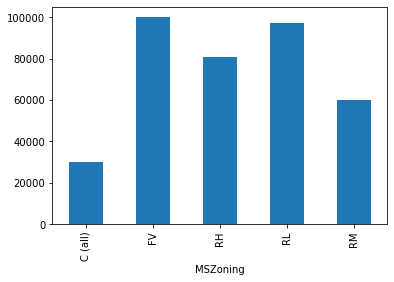

In [66]:
df_whole_new.groupby('MSZoning')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with FV

In [67]:
df_whole_new['MSZoning'].fillna('FV', inplace=True) 

##### 2.10.2 Utilities

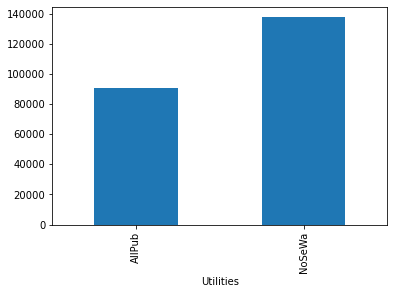

In [68]:
df_whole_new.groupby('Utilities')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with AllPub

In [69]:
df_whole_new['Utilities'].fillna('AllPub', inplace=True) 

##### 2.10.3 Exterior1st

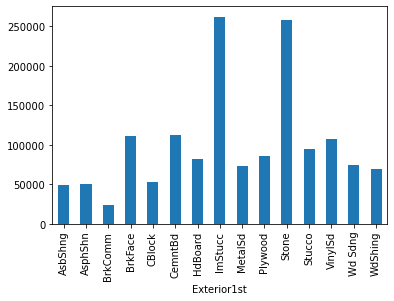

In [70]:
df_whole_new.groupby('Exterior1st')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with Stucco

In [71]:
df_whole_new['Exterior1st'].fillna('Stucco', inplace=True) 

##### 2.10.4 Exterior2nd

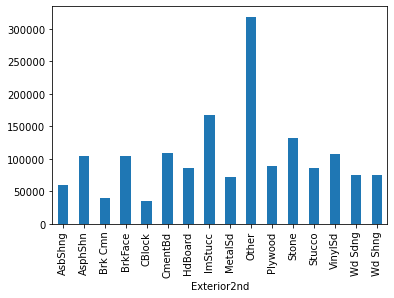

In [72]:
df_whole_new.groupby('Exterior2nd')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with Other

In [73]:
df_whole_new['Exterior2nd'].fillna('Other', inplace=True) 

##### 2.10.5 Electrical

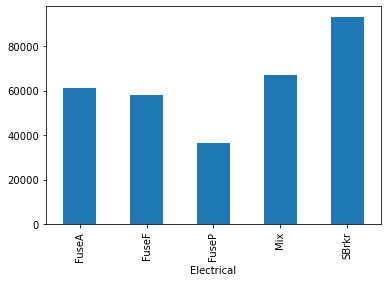

In [74]:
df_whole_new.groupby('Electrical')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with Mix

In [75]:
df_whole_new['Electrical'].fillna('Mix', inplace=True) 

##### 2.10.6 KitchenQual

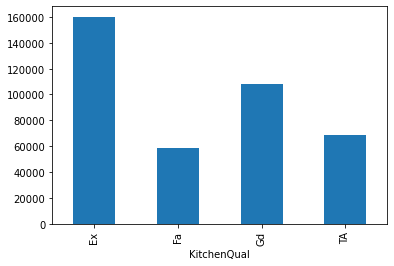

In [76]:
df_whole_new.groupby('KitchenQual')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with TA

In [77]:
df_whole_new['KitchenQual'].fillna('TA', inplace=True) 

##### 2.10.7 Funtional

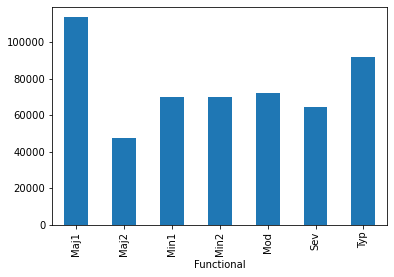

In [78]:
df_whole_new.groupby('Functional')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with Mod

In [79]:
df_whole_new['Functional'].fillna('Mod', inplace=True) 

##### 2.10.8 SaleType

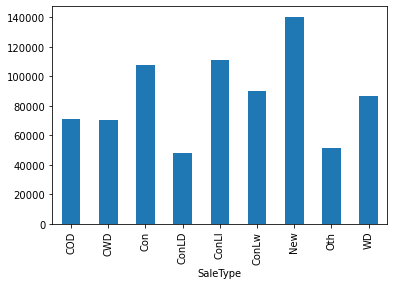

In [80]:
df_whole_new.groupby('SaleType')['SalePrice'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### We will substitute the missing value with Oth

In [81]:
df_whole_new['SaleType'].fillna('Oth', inplace=True) 

### Let's check again the missing values

In [82]:
for col in df_whole_new.columns:
    if df_whole_new[col].isnull().sum() != 0:
        print(col + ' has ', df_whole_new[col].isnull().sum(), ' missing values and is ',  df_whole_new[col].dtype)

SalePrice has  1459  missing values and is  float64


### So we don´t have any more missing values : )

# 3. Engeniering Features

### Let's create another features that can be useful

### Adding total square footage features 

In [83]:
### New column that contains the total square feet that consider the basement, 1st floor and 2nd floor
df_whole_new['TotalSF'] = df_whole_new['TotalBsmtSF'] + df_whole_new['1stFlrSF'] + df_whole_new['2ndFlrSF']
### New column that contains the total square feet of all the bathrooms in the house
df_whole_new['Total_Bathrooms'] = (df_whole_new['FullBath'] + (0.5 * df_whole_new['HalfBath']) +
                                   df_whole_new['BsmtFullBath'] + (0.5 * df_whole_new['BsmtHalfBath']))
### New column that contains the total square feet that of the porch 
df_whole_new['Total_porch_sf'] = (df_whole_new['OpenPorchSF'] + df_whole_new['3SsnPorch'] +
                                  df_whole_new['EnclosedPorch'] + df_whole_new['ScreenPorch'])

### Simplified information of another features

In [84]:
df_whole_new['HasPool'] = df_whole_new['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_whole_new['Has2ndFloor'] = df_whole_new['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_whole_new['HasGarage'] = df_whole_new['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_whole_new['HasBsmt'] = df_whole_new['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_whole_new['HasFireplace'] = df_whole_new['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Now we cann first split the categorical and the continues variables

# a) Numerical variables

### Which are the numeric features that we have

In [85]:
numeric_col=[col for col in df_whole_new.columns if df_whole_new[col].dtypes!='O']
print(len(numeric_col))
df_whole_new[numeric_col].head()

46


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  YrSold  SalePrice  TotalSF  \
0          2003       196.0       706.0  ...    2008   208500.0   2566.0   
1          1976         0.0       978.0  ...    2007   181500.0   2524.0   
2          2002       162.0       486.0  ...    2008   223500.0   2706.0   
3          1970         0.0       216.0  ...    2006   140000.0   2473.0   
4          2000       350.0       655.0  ...    2008   250000.0   3343.0   

   Total_Bathrooms  Total_porch_sf  HasPool  Has2ndFloor  HasGarage  HasBsmt  \
0              3.5              61        0            1          1        1   
1              2.5               0        0            0          1        1   
2              3.5              42        0            1          1        1   
3              2.0             307        0            1          1        1   
4              3.5              84        0            1          1        1   

   HasFireplace  
0             0  
1             1  
2             1  
3             1  
4             1  

[5 rows x 46 columns]

In [86]:
numeric_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalSF',
 'Total_Bathrooms',
 'Total_porch_sf',
 'HasPool',
 'Has2ndFloor',
 'HasGarage',
 'HasBsmt',
 'HasFireplace']

### 3.1 Year feature

### We have some features that correspond to the year, let see which are them

In [87]:
year_col = [col for col in numeric_col if 'Yr' in col or 'Year' in col]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

###  Let's convert the year to number of years

In [88]:
df_whole_new['YearBuilt'] = 2021 - df_whole_new['YearBuilt']
df_whole_new['YearRemodAdd'] = 2021 - df_whole_new['YearRemodAdd']
df_whole_new['GarageYrBlt'] = 2021 - df_whole_new['GarageYrBlt']
df_whole_new['YrSold'] = 2021 - df_whole_new['YrSold']

### Let's see how is the relation between these features and saleprice

### 3.1.1 Year Built

Text(0, 0.5, 'Price')

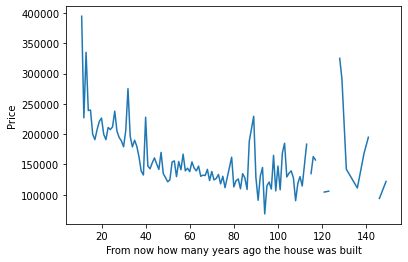

In [89]:
df_whole_new.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('From now how many years ago the house was built')
plt.ylabel('Price')

### The houses that were built more recent are more expensive in general

### 3.1.2 Garage Year Built

Text(0, 0.5, 'Price')

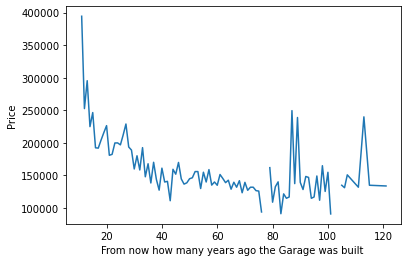

In [90]:
df_whole_new.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('From now how many years ago the Garage was built ')
plt.ylabel('Price')

### The house which has built a garage more recently are more expensive, however that can be also link to the years that the house was built, becuase has the same kind of behaviour

In [91]:
df_whole_new['Samevalue'] = np.where(df_whole_new['GarageYrBlt'] == df_whole_new['YearBuilt'], 'True, 'False')

In [92]:
df_whole_new[df_whole_new['Samevalue']=='True'].count().mean()

2204.4777777777776

In [93]:
df_whole_new.drop(columns=['Samevalue'], inplace= True)

### There are 2203 out of 2919 values that are the same, meaning that the garage was built the same time that the house was built

### Let's extract just the information of the time that the garage was built before the house was already built

In [94]:
df_whole_new['GaraYear'] = df_whole_new['YearBuilt'] - df_whole_new['GarageYrBlt']

### Histogram of the distribution of the amount of years that the garage was built after the house was built

Text(0.5, 1.0, 'Years that the Garage was Built after the house was built histogram')

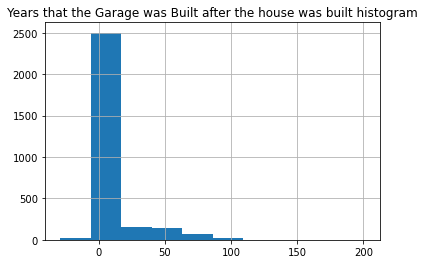

In [95]:
df_whole_new['GaraYear'].hist().set_title('Years that the Garage was Built after the house was built histogram')

Text(0, 0.5, 'Price')

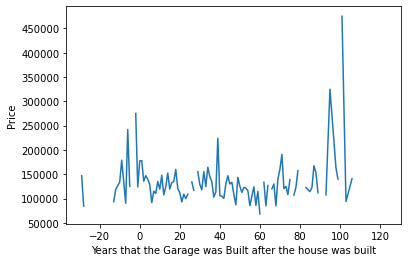

In [96]:
df_whole_new.groupby('GaraYear')['SalePrice'].median().plot()
plt.xlabel('Years that the Garage was Built after the house was built')
plt.ylabel('Price')

### Seems that this data does not bring anything, then we will drop both columns: GaraYear and GarageYrBlt

In [97]:
df_whole_new.drop(columns=['GaraYear','GarageYrBlt'], inplace= True)

In [98]:
numeric_col.remove('GarageYrBlt')

### 3.1.3 Year Remodelation

Text(0, 0.5, 'Price')

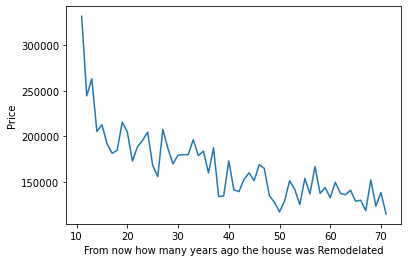

In [99]:
df_whole_new.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('From now how many years ago the house was Remodelated')
plt.ylabel('Price')

### Let see if the remodelation has something to do with the year that was sold 

In [100]:
df_whole_new['soandre'] = df_whole_new['YearRemodAdd'] - df_whole_new['YrSold']

### Histogram of the distribution of the amount of years that was remove the add  and the year that actially was sold

Text(0.5, 1.0, 'years that was remodelated and the year that actually was sold histogram')

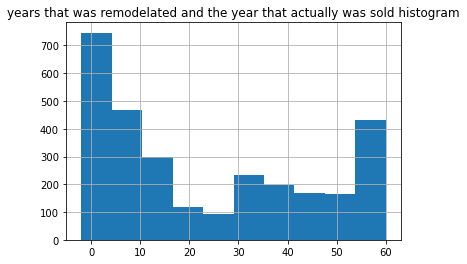

In [101]:
df_whole_new['soandre'].hist().set_title('years that was remodelated and the year that actually was sold histogram')

Text(0, 0.5, 'Price')

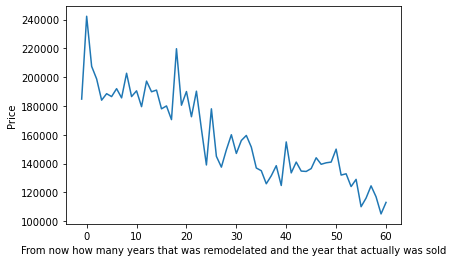

In [102]:
df_whole_new.groupby('soandre')['SalePrice'].median().plot()
plt.xlabel('From now how many years that was remodelated and the year that actually was sold')
plt.ylabel('Price')

### The least the years passed away between remodelating and the selling the house the more expensive was the house

### So we will keep this new feature and we will remove the year remodelation

In [103]:
df_whole_new.drop(columns=['YearRemodAdd'], inplace= True)

In [104]:
numeric_col.remove('YearRemodAdd')

### 3.1.4 Year Sold

Text(0, 0.5, 'Price')

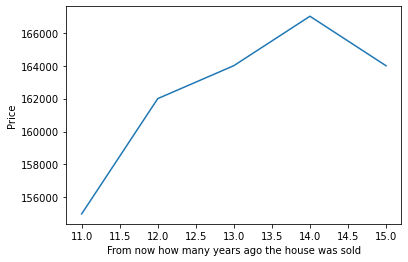

In [105]:
df_whole_new.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('From now how many years ago the house was sold')
plt.ylabel('Price')

### Seems that the house that were sold a long time ago are higher price than the recent ones

### Let see what we can extract from the difference between when was built and sold

In [106]:
df_whole_new['timenosold'] = df_whole_new['YearBuilt'] - df_whole_new['YrSold']

### Histogram of the distribution of the amount of years that pass away between when the house was built and sold

Text(0.5, 1.0, 'years that pass away between when the house was built and sold histogram')

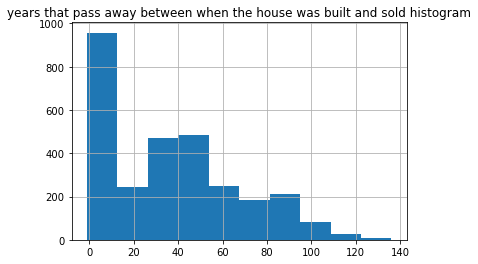

In [107]:
df_whole_new['timenosold'].hist().set_title('years that pass away between when the house was built and sold histogram')

Text(0, 0.5, 'Price')

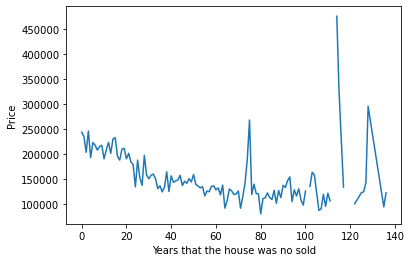

In [108]:
df_whole_new.groupby('timenosold')['SalePrice'].median().plot()
plt.xlabel('Years that the house was no sold')
plt.ylabel('Price')

### The houses that were almost immediately sold after their were built there were generally more expensive

### These last feture gather the information of the sold year and the building year therefore we will not need any more these features

In [109]:
df_whole_new.drop(columns=['YearBuilt','YrSold'], inplace= True)

In [110]:
numeric_col.remove('YearBuilt')
numeric_col.remove('YrSold')

### Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

### 3.2 Numerical variables that are discrete

In [111]:
discrete_col=[col for col in numeric_col if len(df_whole_new[col].unique())<17 and col not in year_col]
discrete_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'Total_Bathrooms',
 'HasPool',
 'Has2ndFloor',
 'HasGarage',
 'HasBsmt',
 'HasFireplace']

### Let's see how is their relation with SalePrice

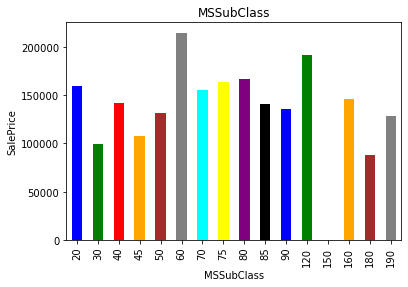

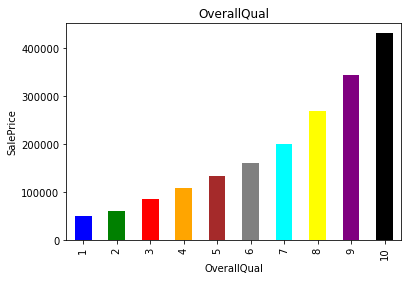

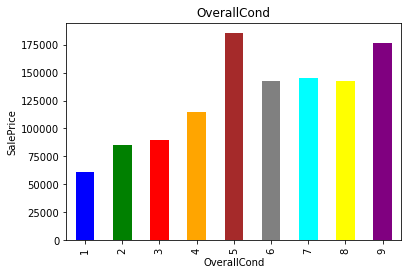

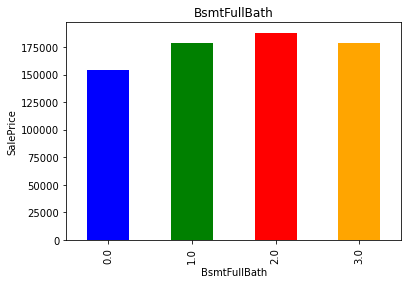

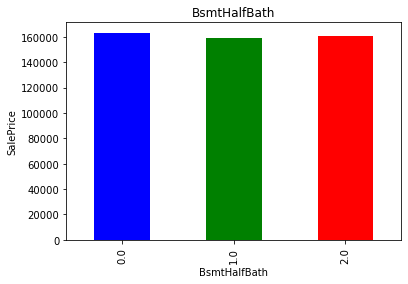

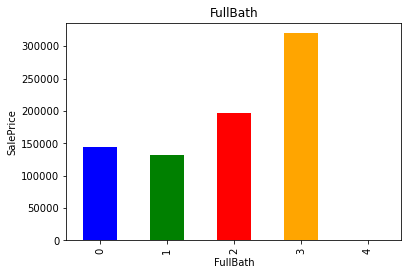

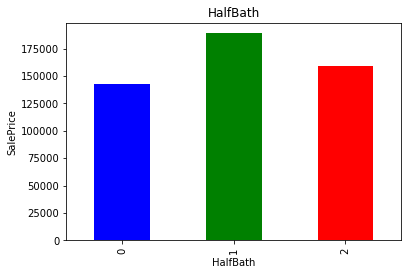

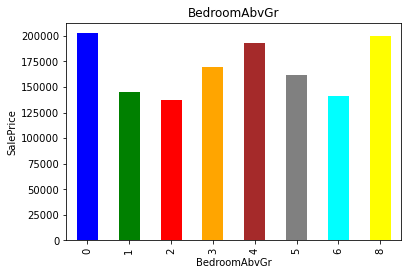

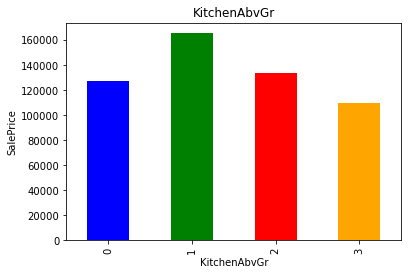

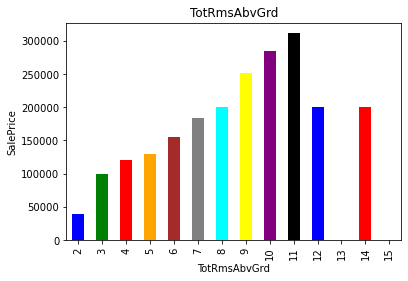

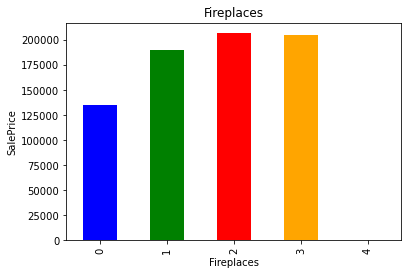

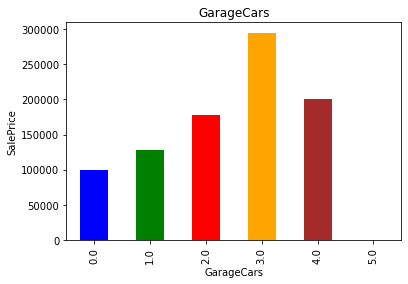

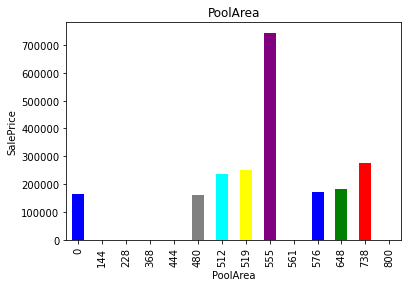

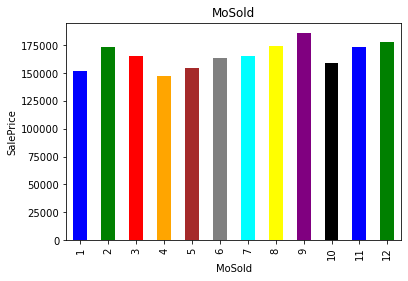

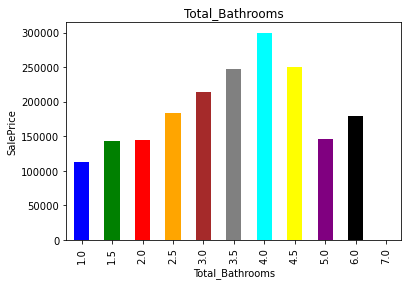

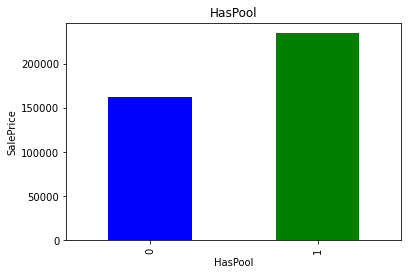

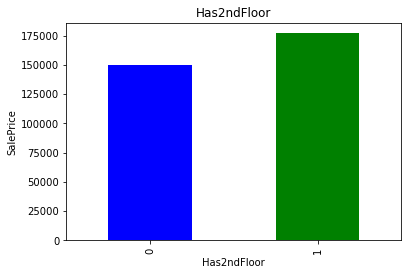

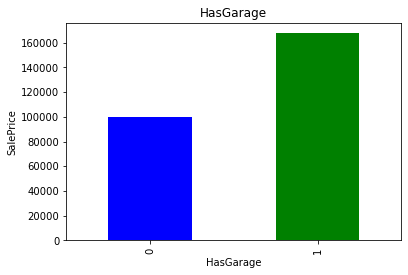

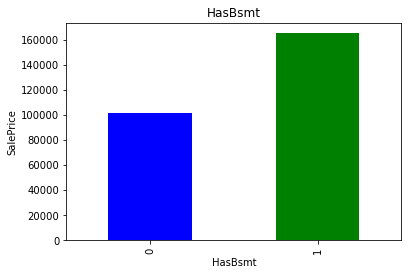

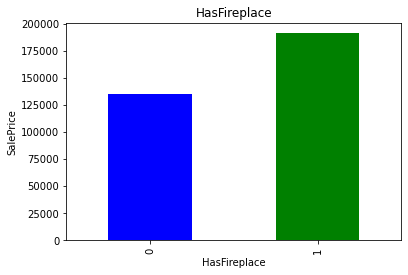

In [112]:
for col in discrete_col:
    df_whole_new.groupby(col)['SalePrice'].median().plot.bar(color=['blue','green','red','orange','brown','grey','cyan','yellow','purple','black'])
    plt.ylabel('SalePrice')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

### From the previous graphs we can deduce that the Pool Area and MoSold features are better to treat them as numeircal variables, the rest we will convert them to categorical variables

In [113]:
df_whole_new['MSSubClass'] = df_whole_new['MSSubClass'].astype('object')
df_whole_new['OverallQual'] = df_whole_new['OverallQual'].astype('object')
df_whole_new['OverallCond'] = df_whole_new['OverallCond'].astype('object')
df_whole_new['BsmtFullBath'] = df_whole_new['BsmtFullBath'].astype('object')
df_whole_new['BsmtHalfBath'] = df_whole_new['BsmtHalfBath'].astype('object')
df_whole_new['FullBath'] = df_whole_new['FullBath'].astype('object')
df_whole_new['HalfBath'] = df_whole_new['HalfBath'].astype('object')
df_whole_new['BedroomAbvGr'] = df_whole_new['BedroomAbvGr'].astype('object')
df_whole_new['KitchenAbvGr'] = df_whole_new['KitchenAbvGr'].astype('object')
df_whole_new['TotRmsAbvGrd'] = df_whole_new['TotRmsAbvGrd'].astype('object')
df_whole_new['Fireplaces'] = df_whole_new['Fireplaces'].astype('object')
df_whole_new['GarageCars'] = df_whole_new['GarageCars'].astype('object')

### Seems that the bathroms in the basement does not have a huge influence in the sale price so we will remove these columns. As well the month that was sold does not have any mayor influence so we will remove it. 

In [114]:
df_whole_new.drop(columns=['BsmtHalfBath', 'BsmtFullBath','MoSold'], inplace= True)

### 3.2 Numerical variables

### Let's check again with all these modification which features are still numeric

In [115]:
continuos_col = [col for col in numeric_col if col not in discrete_col+year_col+['Id']+['soandre']+['timenosold']+['SalePrice']+['BsmtHalfBath']+['BsmtFullBath']+['MoSold']]
continuos_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'TotalSF',
 'Total_porch_sf']

### Let's see the histogram of these

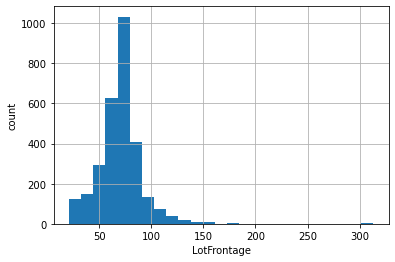

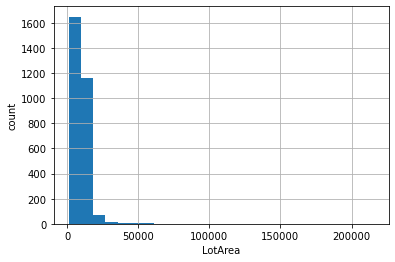

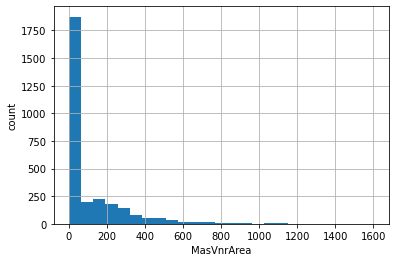

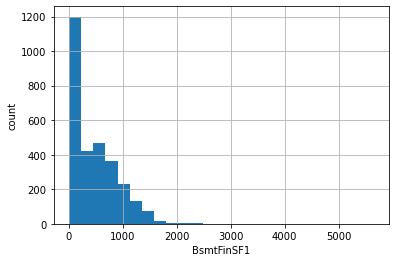

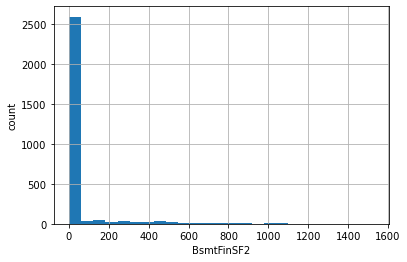

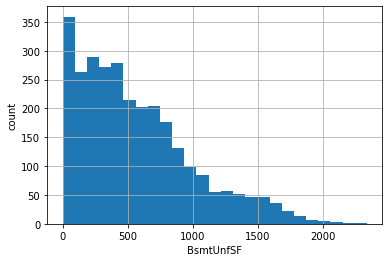

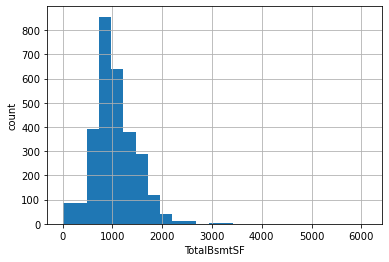

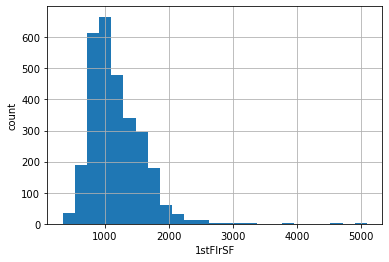

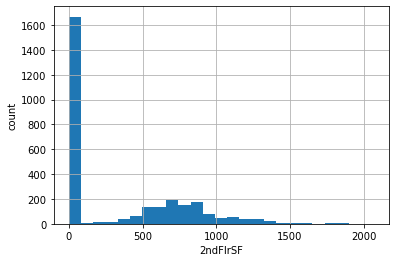

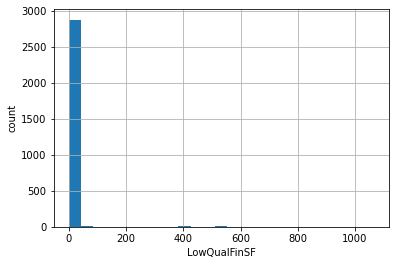

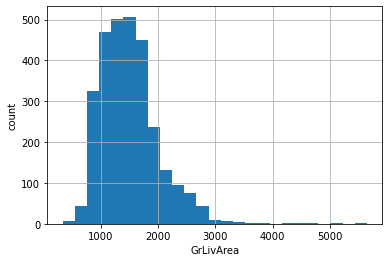

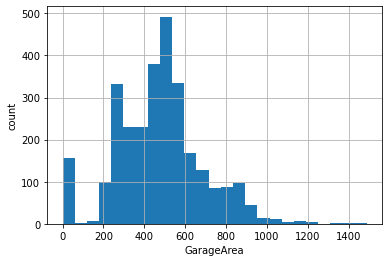

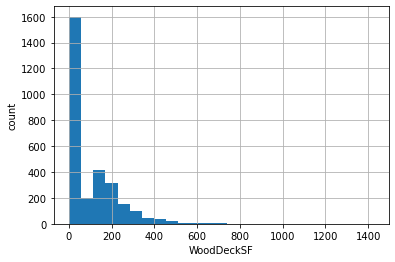

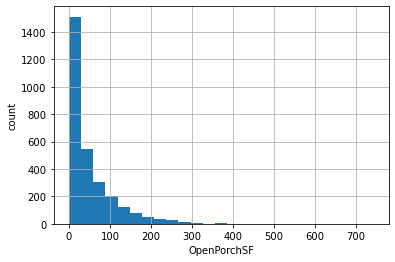

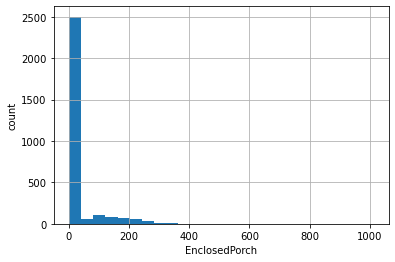

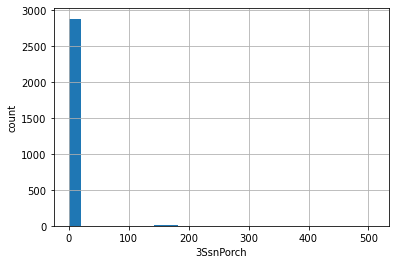

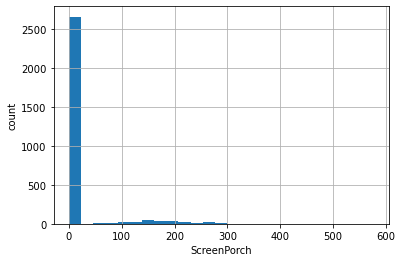

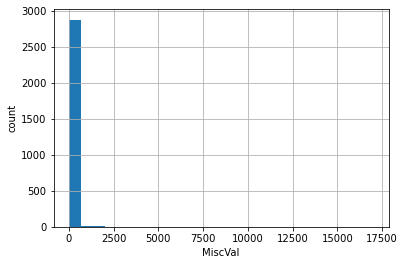

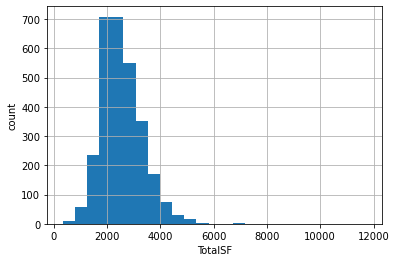

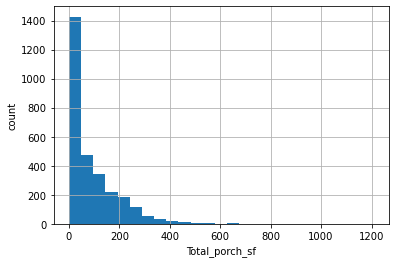

In [116]:
for col in continuos_col:
    df_whole_new[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

### Which is the skew of the numeric variables

In [117]:
from scipy import stats

In [118]:
skewed_features = df_whole_new[continuos_col].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness.head()

Skew value
MiscVal        21.947195
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
BsmtFinSF2      4.146143

In [119]:
skewness.shape

(20, 1)

### Fixing the skewness of some of the columns

In [120]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [121]:
high_skew = skewed_features[abs(skewed_features) > 0.5]

In [122]:
skewed_features = high_skew.index

In [123]:
for col in skewed_features:
        df_whole_new[col] = boxcox1p(df_whole_new[col], boxcox_normmax(df_whole_new[col] + 1))

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


### It worked?

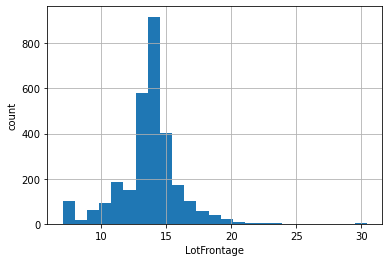

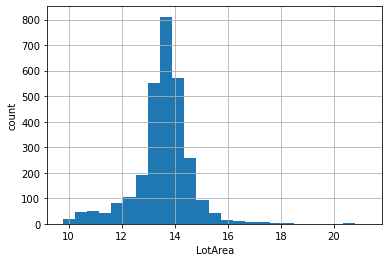

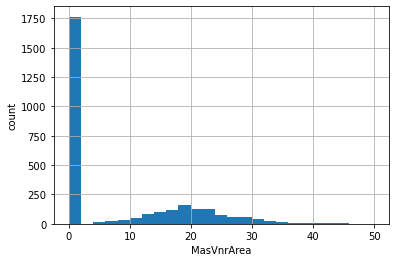

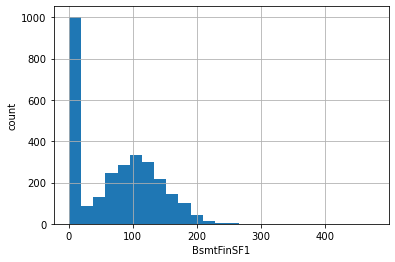

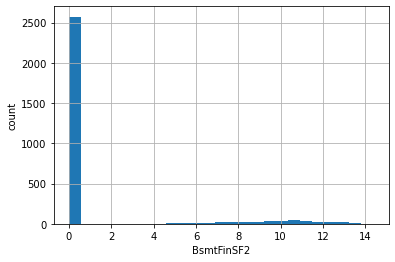

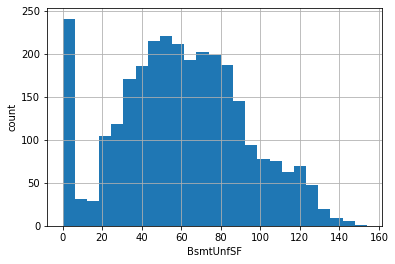

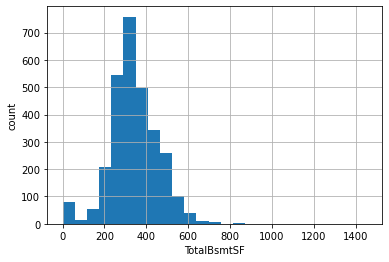

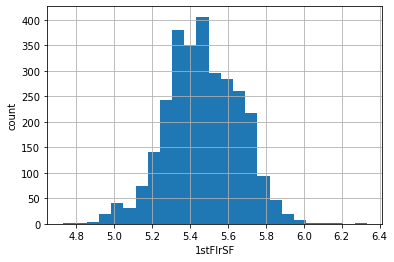

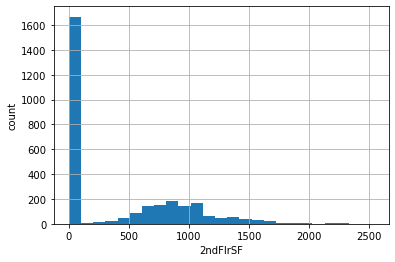

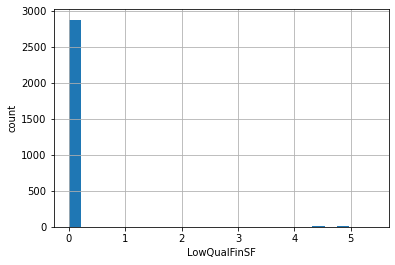

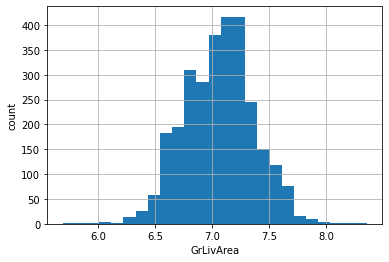

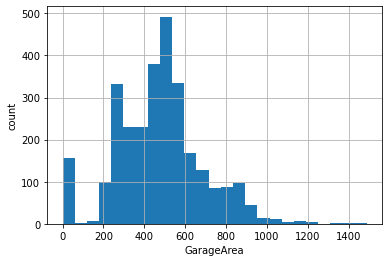

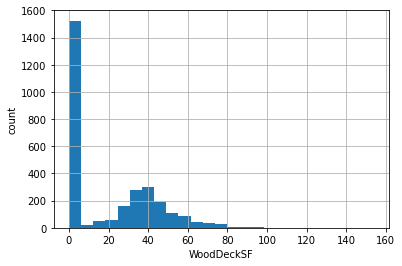

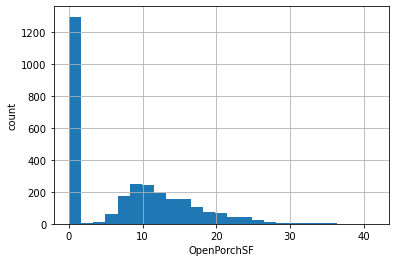

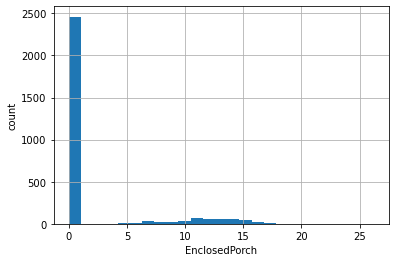

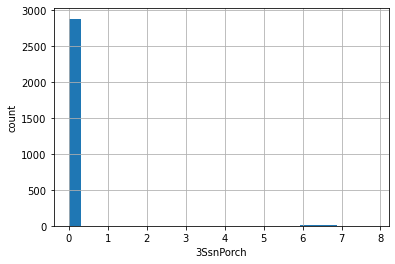

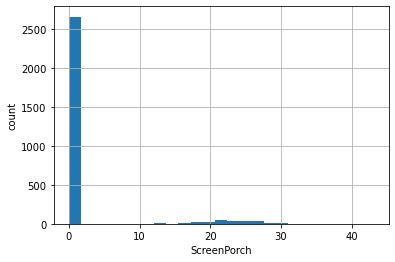

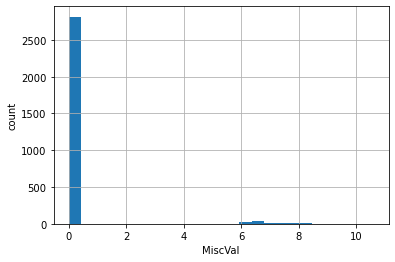

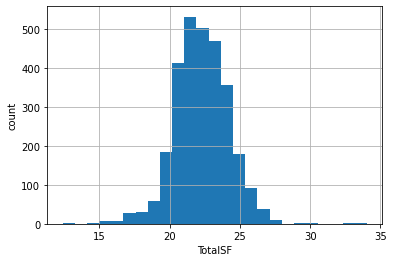

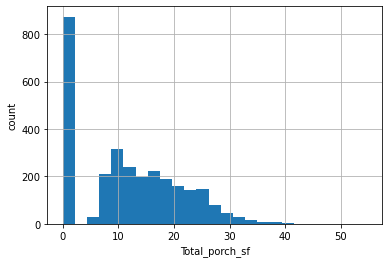

In [124]:
for col in continuos_col:
    df_whole_new[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [125]:
skewed_features1 = df_whole_new[continuos_col].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness1 = pd.DataFrame({'Skew value' :skewed_features1})
skewness1.head()

Skew value
3SsnPorch       8.865144
LowQualFinSF    8.495602
MiscVal         5.239894
ScreenPorch     3.153911
BsmtFinSF2      2.579468

In [126]:
skewness1.shape

(20, 1)

### Let's see how is their relation with Sale Price, for that we will use the logarithm scale

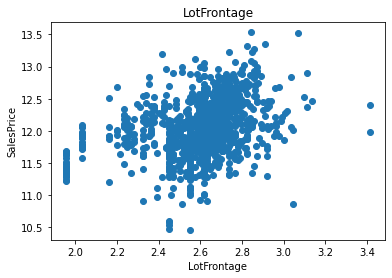

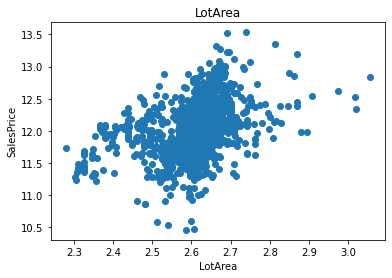

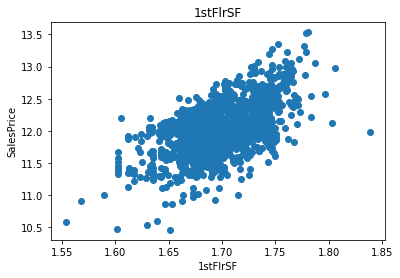

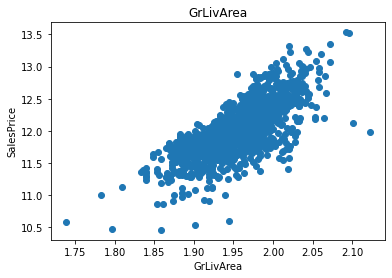

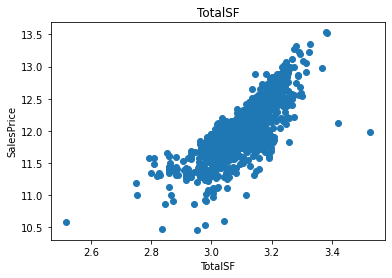

In [127]:
for col in continuos_col:
    data= df_whole_new.copy()
    if 0 in data[col].unique():           # bcoz log(0) is not defined
        pass
    else:
        data[col]=np.log(data[col])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[col],data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalesPrice')
        plt.title(col)
        plt.show()

### Let's check the correlation 

In [128]:
cornu=[]
for col in continuos_col:
    cornu= df_whole_new['SalePrice'].corr(df_whole_new[col])
    print(col, cornu)

LotFrontage 0.3429474921491707
LotArea 0.3906209686440095
MasVnrArea 0.45110488810739147
BsmtFinSF1 0.3349778171033955
BsmtFinSF2 -0.044710307048888245
BsmtUnfSF 0.20214935700350445
TotalBsmtSF 0.6075624007878595
1stFlrSF 0.5885261486489634
2ndFlrSF 0.3239078873156424
LowQualFinSF -0.04514183931102294
GrLivArea 0.6948427966776257
GarageArea 0.6234314389183617
WoodDeckSF 0.33765584820784156
OpenPorchSF 0.40653586613678533
EnclosedPorch -0.16570258799835907
3SsnPorch 0.04743159697053247
ScreenPorch 0.1030734617510787
MiscVal -0.06319430858675022
TotalSF 0.7758972546055268
Total_porch_sf 0.25099389995461047


### Seems that the features that does not have a strong correlation ( < abs(0.3) ) are: 'LotArea','BsmtFinSF2', 'BsmtUnfSF','LowQualFinSF', 'EnclosedPorch', 'MiscVal','3Ssnporch','ScreenPorch','Total_porch_sf'. So it is better if we remove these columns

In [129]:
df_whole_new.drop(columns=['LotArea','BsmtFinSF2', 'BsmtUnfSF','LowQualFinSF', 'EnclosedPorch', 'MiscVal', '3SsnPorch', 'ScreenPorch', 'Total_porch_sf'], inplace= True)


# b) Categorical variables

### Let's see which are the categorical variables that we have

In [130]:
categorical_col=[col for col in df_whole_new.columns if df_whole_new[col].dtypes=='O'] #'O'     (Python) objects
categorical_col

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [131]:
for col in categorical_col:
    print(f'{col} has {len(df_whole_new[col].unique())} uniques values that are {df_whole_new[col].unique()}')

MSSubClass has 16 uniques values that are [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40 150]
MSZoning has 5 uniques values that are ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street has 2 uniques values that are ['Pave' 'Grvl']
Alley has 3 uniques values that are ['No Alley' 'Grvl' 'Pave']
LotShape has 4 uniques values that are ['Reg' 'IR1' 'IR2' 'IR3']
LandContour has 4 uniques values that are ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities has 2 uniques values that are ['AllPub' 'NoSeWa']
LotConfig has 5 uniques values that are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope has 3 uniques values that are ['Gtl' 'Mod' 'Sev']
Neighborhood has 25 uniques values that are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 has 9 uniques values that are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRA

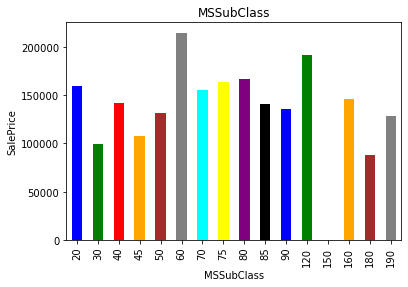

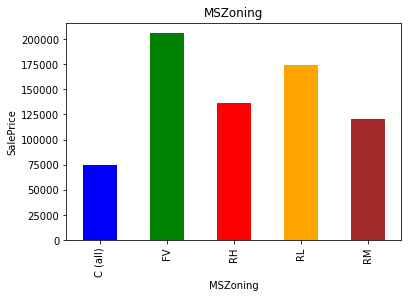

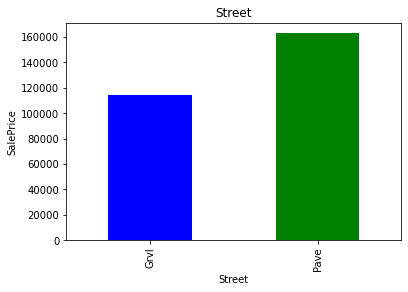

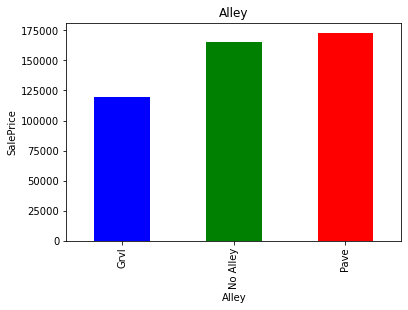

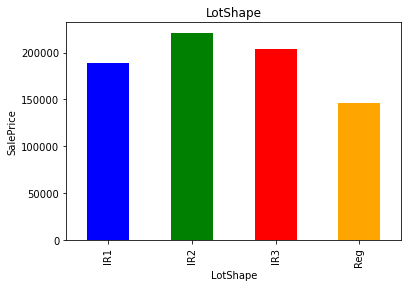

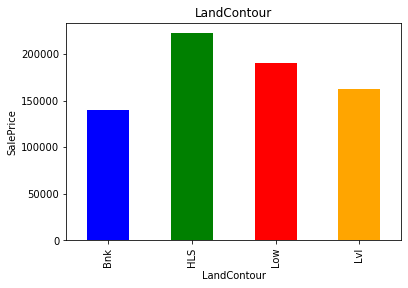

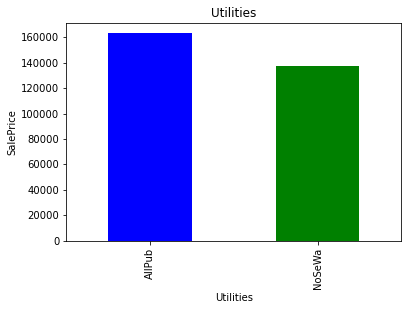

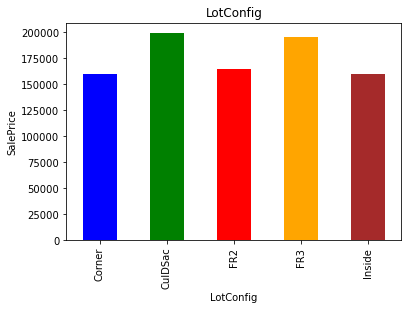

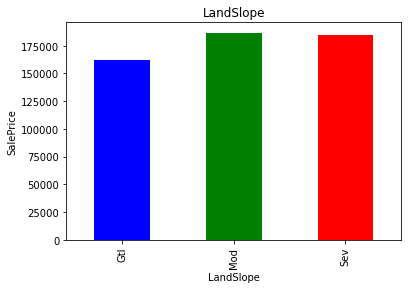

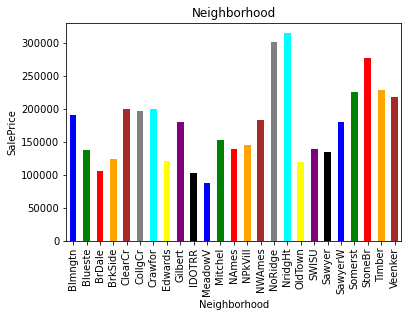

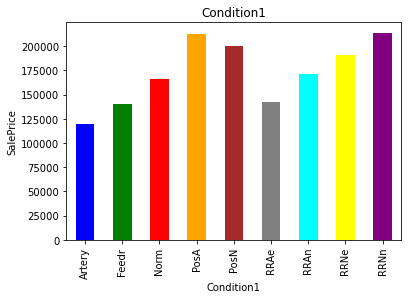

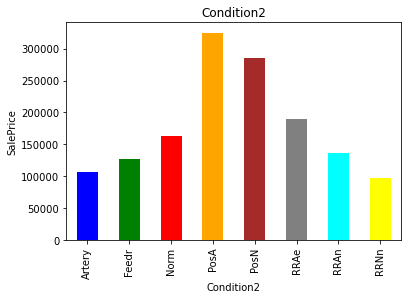

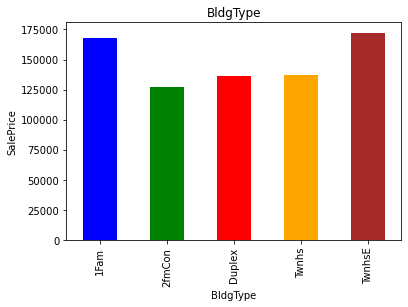

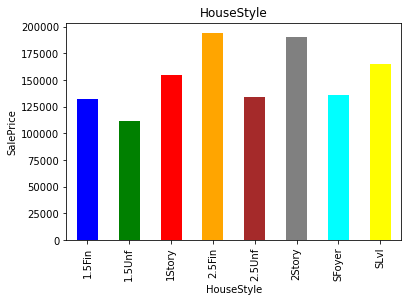

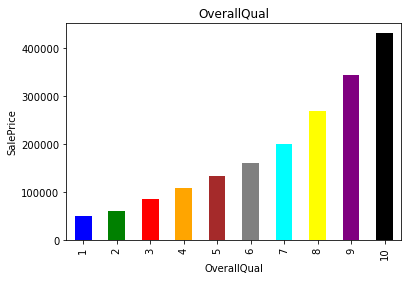

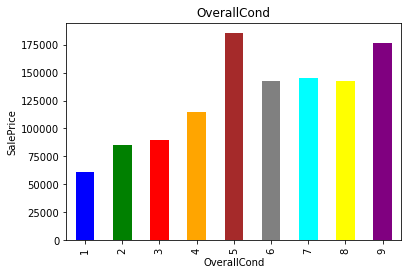

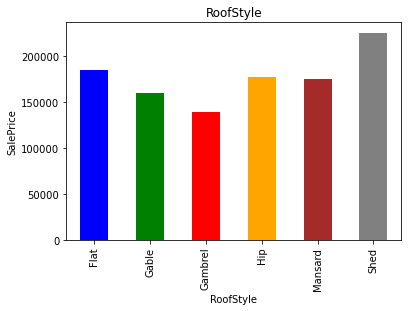

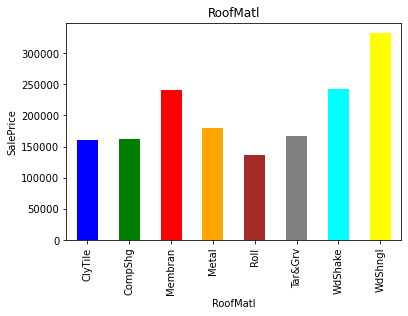

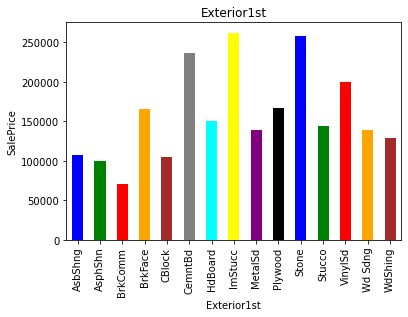

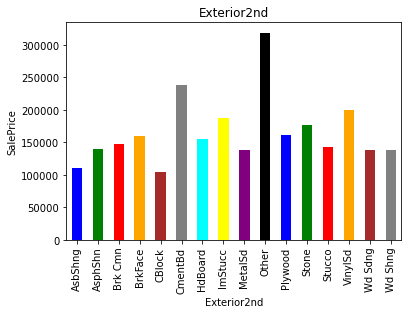

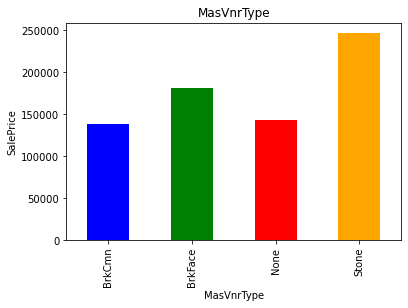

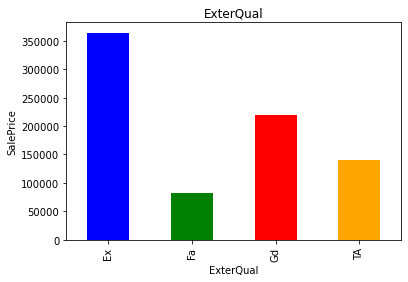

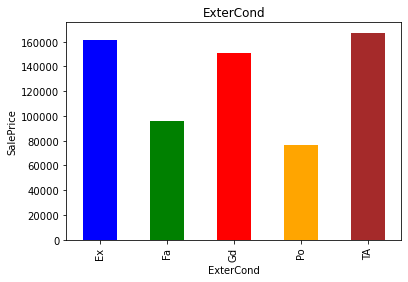

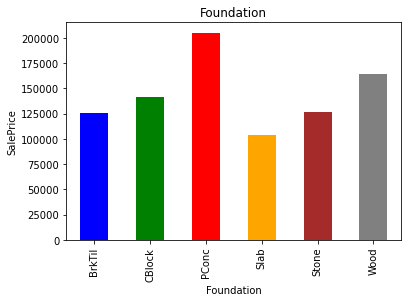

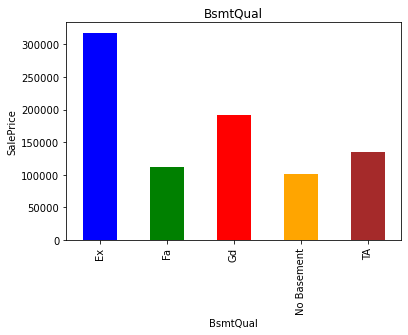

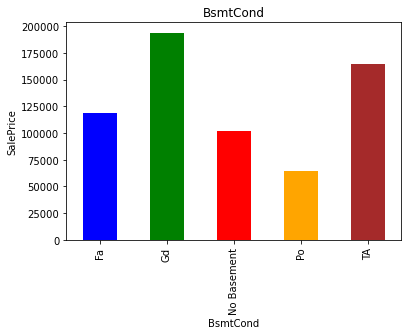

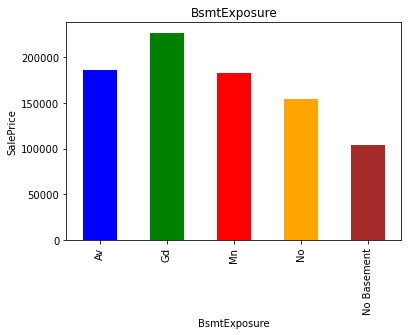

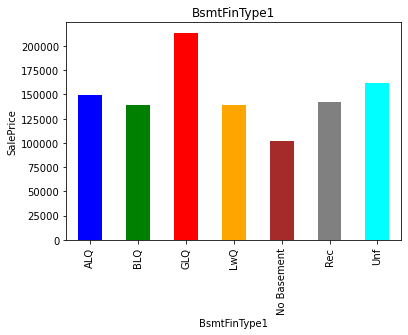

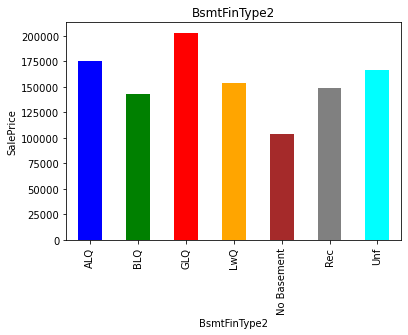

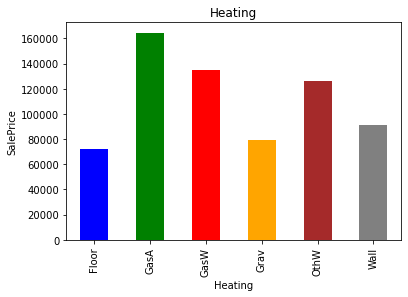

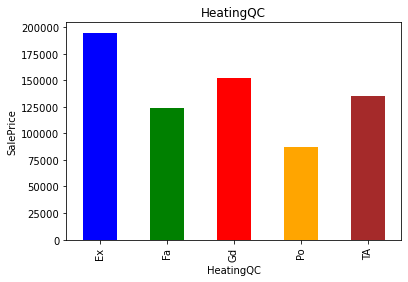

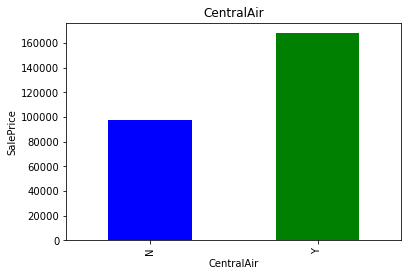

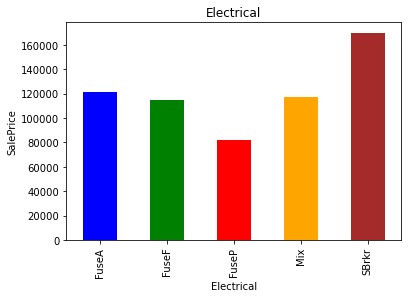

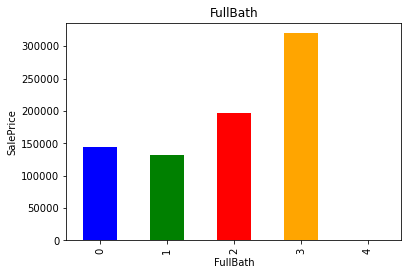

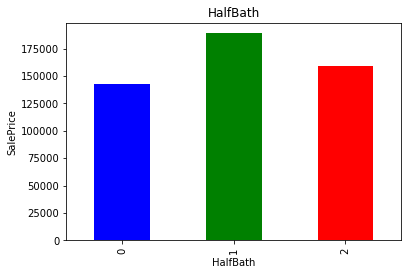

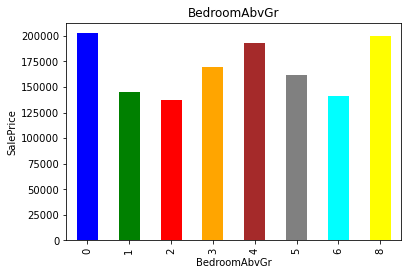

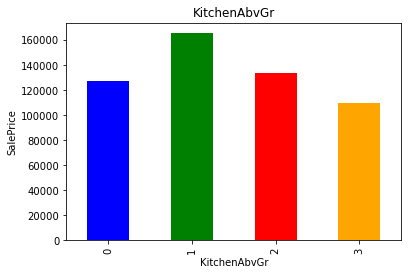

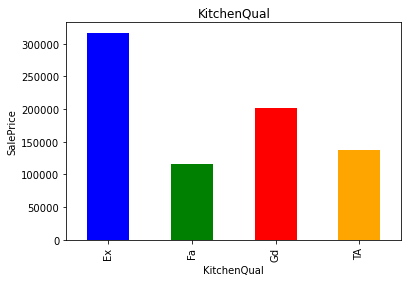

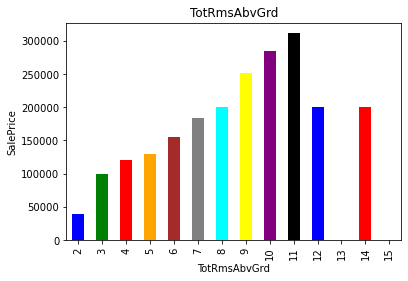

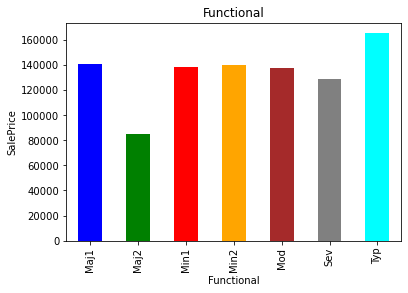

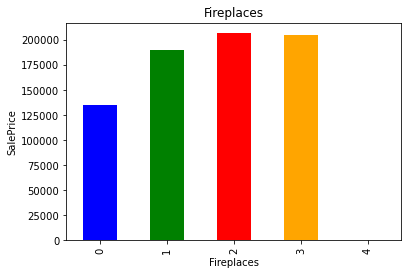

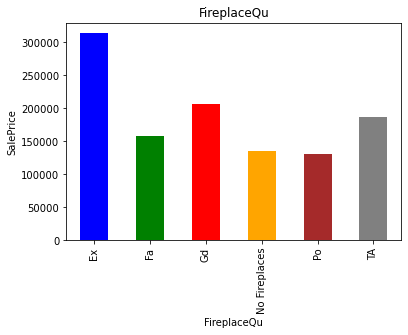

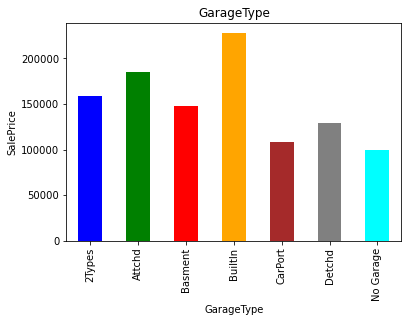

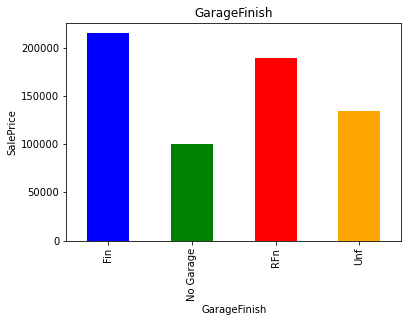

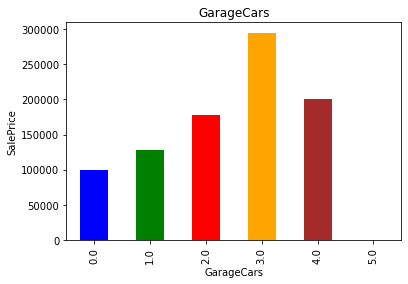

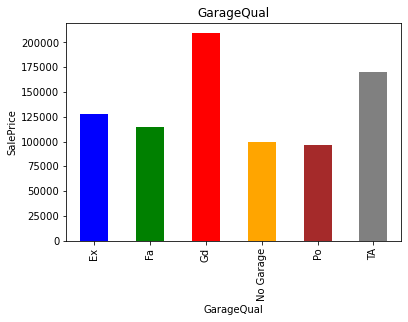

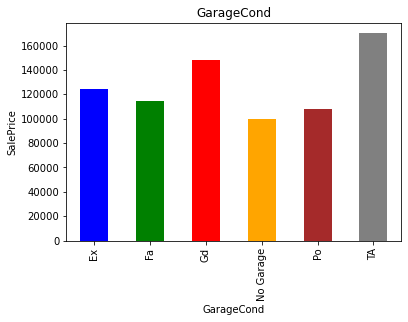

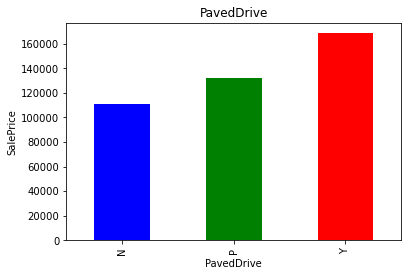

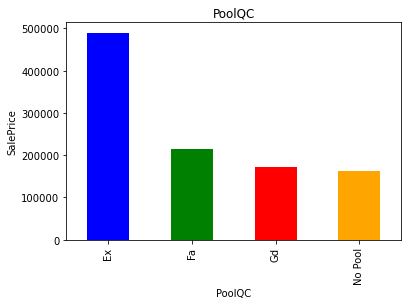

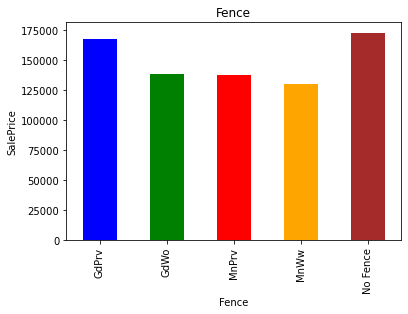

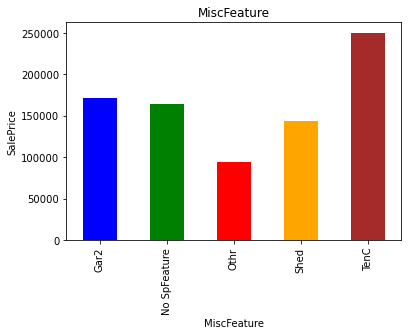

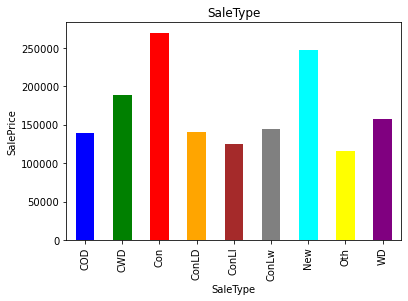

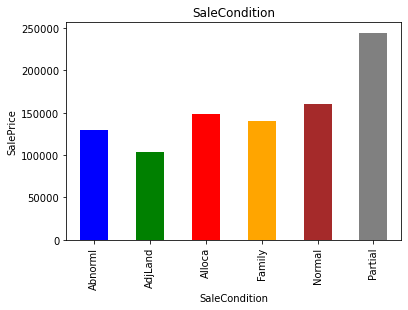

In [132]:
# Relationship b/w categorical and dependent variable
for col in categorical_col:
    df_whole_new.groupby(col)['SalePrice'].median().plot.bar(color=['blue','green','red','orange','brown','grey','cyan','yellow','purple','black'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

### Seems that the feature LandSlope does not influence much Sale Price, then we will drop this column

In [133]:
df_whole_new.drop(columns=['LandSlope'], inplace= True)

In [134]:
categorical_col.remove('LandSlope')

In [135]:
df_whole_new.shape

(2919, 74)

# 4. Preparing data

### Dummies: Categorical Variables

In [136]:
categorical_var = df_whole_new[categorical_col]
categorical_dummies = pd.get_dummies(categorical_var, drop_first=True)

In [137]:
categorical_dummies

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1454              0              0              0              0   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 1              0              0              0   
3                 0              1              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
1454              0              0              0              0   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              1              0              0              0   

      MSSubClass_85  MSSubClass_90  ...  SaleType_ConLI  SaleType_ConLw  \
0                 0              0  ...               0               0   
1                 0              0  ...               0               0   
2                 0              0  ...               0               0   
3                 0              0  ...               0               0   
4                 0              0  ...               0               0   
...             ...            ...  ...             ...             ...   
1454              0              0  ...               0               0   
1455              0              0  ...               0               0   
1456              0              0  ...               0               0   
1457              1              0  ...               0               0   
1458              0              0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      0   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1454             0             0            1                      0   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1454                     0                     0                     1   
1455          

In [138]:
# drop categorical variables to change them by the dummies variable
df_whole_new.drop(categorical_col, axis=1, inplace=True)

In [139]:
# concat dummy variables with X
df_whole_new= pd.concat([df_whole_new, categorical_dummies], axis=1)

In [140]:
df_whole_new.head()

Id  LotFrontage  MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0   1    13.360620   19.378556  117.868634   294.379426  5.318379   
1   2    14.945969    0.000000  146.822671   403.706393  5.550627   
2   3    13.691700   17.721067   91.584523   312.170637  5.362015   
3   4    12.790817    0.000000   52.780850   266.066093  5.388291   
4   5    15.342156   25.323124  112.052296   372.990803  5.493031   

      2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  ...  SaleType_ConLI  \
0  1019.540925   7.234116       548.0    0.000000  ...               0   
1     0.000000   6.947212       460.0   56.339211  ...               0   
2  1034.306612   7.275132       608.0    0.000000  ...               0   
3   899.200699   7.237970       642.0    0.000000  ...               0   
4  1265.167952   7.470741       836.0   42.351294  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 313 columns]

In [141]:
df_whole_new.shape

(2919, 313)

### Normalizing

In [142]:
scale_features=[col for col in df_whole_new.columns if col not in ['Id','SalePrice']]

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_whole_new[scale_features])

MinMaxScaler()

In [144]:
scaler.transform(df_whole_new[scale_features])

array([[0.2697958 , 0.38856724, 0.24768331, ..., 0.        , 1.        ,
        0.        ],
       [0.33766281, 0.        , 0.30852589, ..., 0.        , 1.        ,
        0.        ],
       [0.28396895, 0.35533227, 0.19245118, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.62037878, 0.        , 0.3588076 , ..., 0.        , 0.        ,
        0.        ],
       [0.25528135, 0.        , 0.15015101, ..., 0.        , 1.        ,
        0.        ],
       [0.31137848, 0.27386245, 0.2598465 , ..., 0.        , 1.        ,
        0.        ]])

In [145]:
data = pd.concat([df_whole_new[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df_whole_new[scale_features]), columns=scale_features)],axis=1)

In [146]:
data.head()

Id  SalePrice  LotFrontage  MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0   1   208500.0     0.269796    0.388567    0.247683     0.202430  0.367989   
1   2   181500.0     0.337663    0.000000    0.308526     0.277608  0.512633   
2   3   223500.0     0.283969    0.355332    0.192451     0.214664  0.395166   
3   4   140000.0     0.245403    0.000000    0.110911     0.182960  0.411531   
4   5   250000.0     0.354623    0.507764    0.235461     0.256487  0.476763   

   2ndFlrSF  GrLivArea  GarageArea  ...  SaleType_ConLI  SaleType_ConLw  \
0  0.402560   0.580105    0.368280  ...             0.0             0.0   
1  0.000000   0.472661    0.309140  ...             0.0             0.0   
2  0.408390   0.595465    0.408602  ...             0.0             0.0   
3  0.355044   0.581548    0.431452  ...             0.0             0.0   
4  0.499544   0.668719    0.561828  ...             0.0             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    0.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 313 columns]

### Split the test and the train dataset after preprocesing 

### Getting the train dataset after preprocesing 

In [147]:
df_train_mod = data[0:1460]
df_train_mod

Id  SalePrice  LotFrontage  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0        1   208500.0     0.269796    0.388567    0.247683     0.202430   
1        2   181500.0     0.337663    0.000000    0.308526     0.277608   
2        3   223500.0     0.283969    0.355332    0.192451     0.214664   
3        4   140000.0     0.245403    0.000000    0.110911     0.182960   
4        5   250000.0     0.354623    0.507764    0.235461     0.256487   
...    ...        ...          ...         ...         ...          ...   
1455  1456   175000.0     0.255281    0.000000    0.000000     0.220909   
1456  1457   210000.0     0.358798    0.306874    0.267194     0.326736   
1457  1458   266500.0     0.274557    0.000000    0.130764     0.257762   
1458  1459   142125.0     0.283969    0.000000    0.039686     0.244210   
1459  1460   147500.0     0.315834    0.000000    0.276240     0.276534   

      1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  ...  SaleType_ConLI  \
0     0.367989  0.402560   0.580105    0.368280  ...             0.0   
1     0.512633  0.000000   0.472661    0.309140  ...             0.0   
2     0.395166  0.408390   0.595465    0.408602  ...             0.0   
3     0.411531  0.355044   0.581548    0.431452  ...             0.0   
4     0.476763  0.499544   0.668719    0.561828  ...             0.0   
...        ...       ...        ...         ...  ...             ...   
1455  0.408397  0.325079   0.566841    0.309140  ...             0.0   
1456  0.691696  0.000000   0.648067    0.336022  ...             0.0   
1457  0.490385  0.548010   0.690791    0.169355  ...             0.0   
1458  0.454404  0.000000   0.416836    0.161290  ...             0.0   
1459  0.510882  0.000000   0.470974    0.185484  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0.0           0.0           0.0          1.0   
1                0.0           0.0           0.0          1.0   
2                0.0           0.0           0.0          1.0   
3                0.0           0.0           0.0          1.0   
4                0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
1455             0.0           0.0           0.0          1.0   
1456             0.0           0.0           0.0          1.0   
1457             0.0           0.0           0.0          1.0   
1458             0.0           0.0           0.0          1.0   
1459             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455                   1.0                    0.0  
1456                   1.0                    0.0  
1457                   1.0                    0.0  
1458                   1.0              

##### Let's remove the column Id since will not be of use in the machine learning techiniques

In [148]:
df_train_mod.drop(columns=['Id'], inplace= True)

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [149]:
df_train_mod.shape

(1460, 312)

### Getting the test dataset after preprocesing 

In [150]:
df_test_mod = data[1460:]
df_test_mod

Id  SalePrice  LotFrontage  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
1460  1461        NaN     0.337663    0.000000    0.187597     0.207420   
1461  1462        NaN     0.341943    0.292897    0.296731     0.289536   
1462  1463        NaN     0.311378    0.000000    0.267422     0.216182   
1463  1464        NaN     0.329018    0.123285    0.222419     0.215802   
1464  1465        NaN     0.153484    0.000000    0.126851     0.280824   
...    ...        ...          ...         ...         ...          ...   
2914  2915        NaN     0.000000    0.000000    0.000000     0.140361   
2915  2916        NaN     0.000000    0.000000    0.123211     0.140361   
2916  2917        NaN     0.620379    0.000000    0.358808     0.270790   
2917  2918        NaN     0.255281    0.000000    0.150151     0.213144   
2918  2919        NaN     0.311378    0.273862    0.259847     0.228986   

      1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  ...  SaleType_ConLI  \
1460  0.385219  0.000000   0.351253    0.490591  ...             0.0   
1461  0.531602  0.000000   0.490973    0.209677  ...             0.0   
1462  0.398419  0.328458   0.562958    0.323925  ...             0.0   
1463  0.397609  0.317359   0.557492    0.315860  ...             0.0   
1464  0.517834  0.000000   0.477675    0.340054  ...             0.0   
...        ...       ...        ...         ...  ...             ...   
2914  0.195271  0.253896   0.421410    0.000000  ...             0.0   
2915  0.195271  0.253896   0.421410    0.192204  ...             0.0   
2916  0.501389  0.000000   0.461836    0.387097  ...             0.0   
2917  0.415023  0.000000   0.379407    0.000000  ...             0.0   
2918  0.424919  0.475607   0.635418    0.436828  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1460             0.0           0.0           0.0          1.0   
1461             0.0           0.0           0.0          1.0   
1462             0.0           0.0           0.0          1.0   
1463             0.0           0.0           0.0          1.0   
1464             0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
2914             0.0           0.0           0.0          1.0   
2915             0.0           0.0           0.0          1.0   
2916             0.0           0.0           0.0          1.0   
2917             0.0           0.0           0.0          1.0   
2918             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1460                    0.0                   0.0                   0.0   
1461                    0.0                   0.0                   0.0   
1462                    0.0                   0.0                   0.0   
1463                    0.0                   0.0                   0.0   
1464                    0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
2914                    0.0                   0.0                   0.0   
2915                    0.0                   0.0                   0.0   
2916                    0.0                   0.0                   0.0   
2917                    0.0                   0.0                   0.0   
2918                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1460                   1.0                    0.0  
1461                   1.0                    0.0  
1462                   1.0                    0.0  
1463                   1.0                    0.0  
1464                   1.0                    0.0  
...                    ...                    ...  
2914                   1.0                    0.0  
2915                   0.0                    0.0  
2916                   0.0                    0.0  
2917                   1.0              

##### Let's remove the column Id since will not be of use in the machine learning techiniques and as well we will erase the column Sale Price since did not exist at the begining in this dataframe

In [151]:
df_test_mod.drop(columns=['Id','SalePrice'], inplace= True)

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
df_test_mod.shape

(1459, 311)

### Let's define our X and Y

In [153]:
X = df_train_mod.drop('SalePrice',1).values
y = df_train_mod['SalePrice'].values

### Splitting intro train and test

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1095, 311) (1095,)
Test set: (365, 311) (365,)


# 5. Modelling

### Ridge Regression

In [155]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [156]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [157]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-18856.597995399214


In [158]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.011965      0.003854         0.000902        0.000149      0.0001   
1        0.011563      0.002604         0.000845        0.000165       0.001   
2        0.008373      0.001068         0.000728        0.000093        0.01   
3        0.008049      0.000787         0.000661        0.000069        0.05   
4        0.007682      0.000666         0.000635        0.000049         0.1   
5        0.008199      0.000620         0.000709        0.000063         0.2   
6        0.008025      0.000527         0.000721        0.000068         0.3   
7        0.010467      0.004939         0.000726        0.000064         0.4   
8        0.008254      0.000679         0.000685        0.000070         0.5   
9        0.007993      0.000369         0.000719        0.000043         0.6   
10       0.008641      0.000669         0.001128        0.000846         0.7   
11       0.007691      0.000594         0.000674        0.000073         0.8   
12       0.007702      0.000078         0.000653        0.000060         0.9   
13       0.007941      0.000565         0.000716        0.000069           1   
14       0.007880      0.000478         0.000684        0.000076           2   
15       0.007989      0.000525         0.000687        0.000062           3   
16       0.007666      0.000959         0.000621        0.000052           4   
17       0.007716      0.000426         0.000711        0.000057           5   
18       0.007465      0.000313         0.000647        0.000061           6   
19       0.008166      0.000521         0.000691        0.000060           7   
20       0.008197      0.000663         0.000711        0.000063           8   
21       0.007860      0.000594         0.000595        0.000007           9   
22       0.007988      0.000246         0.000706        0.000056          10   
23       0.007666      0.000280         0.000645        0.000071          20   
24       0.007480      0.000228         0.000658        0.000051          50   
25       0.007370      0.000169         0.000642        0.000061         100   
26       0.008773      0.000711         0.000762        0.000158         500   
27       0.009079      0.002122         0.000704        0.000097        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -21942.428296      -21158.882221   
1    {'alpha': 0.001}      -21394.526763      -22242.026002   
2     {'alpha': 0.01}      -21236.493940      -22614.050951   
3     {'alpha': 0.05}      -21415.324527      -22372.860728   
4      {'alpha': 0.1}      -21397.330104      -22170.893036   
5      {'alpha': 0.2}      -21303.363411      -21879.619540   
6      {'alpha': 0.3}      -21137.489389      -21643.299670   
7      {'alpha': 0.4}      -20992.657954      -21442.417503   
8      {'alpha': 0.5}      -20870.949846      -21274.625195   
9      {'alpha': 0.6}      -20778.976626      -21136.554784   
10     {'alpha': 0.7}      -20708.943473      -21008.161813   
11     {'alpha': 0.8}      -20639.854361      -20897.415588   
12     {'alpha': 0.9}      -20590.411148      -20799.956263   
13     {'alpha': 1.0}      -20543.362338      -20709.683604   
14     {'alpha': 2.0}      -20188.733121      -20109.900279   
15     {'alpha': 3.0}      -19985.568538      -19764.164279   
16     {'alpha': 4.0}      -19843.951922      -19518.944859   
17     {'alpha': 5.0}      -19716.209961      -19345.418443   
18     {'alpha': 6.0}      -19615.466850      -19229.606782   
19     {'alpha': 7.0}      -19527.878564      -19144.534306   
20     {'alpha': 8.0}      -19445.478483      -19071.874443   
21     {'alpha': 9.0}      -19375.503868      -19006.042408   
22    {'alpha': 10.0}      -19316.038783      -18950.052681   
23      {'alpha': 20}      -19220.858958      -18793.725404   
24      {'alpha': 50}      -20102.817307      -19576.654909   
25     {'alpha': 100}      -21784.679425     

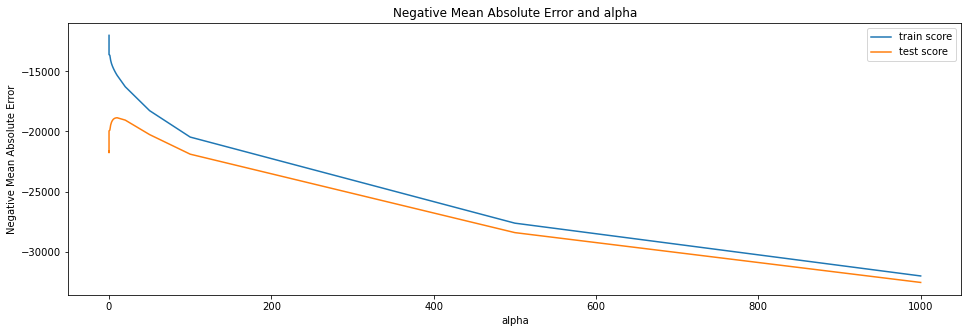

In [159]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [160]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.70995339e+03,  1.28488380e+04,  1.52125278e+04,  1.67801567e+04,
        3.13788315e+04,  2.48541683e+04,  2.98764908e+04,  7.53716397e+03,
        5.70959373e+03,  7.01507012e+03,  3.81670415e+03,  2.70962174e+04,
        1.48031778e+04,  2.53473427e+03, -3.25124897e+02,  3.29729950e+03,
        4.18705278e+03,  5.03354043e+03, -1.27902615e+04, -6.84636714e+03,
       -6.63939321e+03,  5.75929301e+02,  2.68711955e+03,  1.50897837e+03,
       -1.24027259e+03,  4.43134254e+03,  3.64139475e+03, -3.38948216e+03,
       -2.85369588e+03, -1.75903391e+03, -1.03998615e+04,  0.00000000e+00,
       -1.04636985e+04, -1.89280528e+03, -4.45150910e+02,  4.65980283e+03,
        4.16950565e+03,  7.44333946e+03,  1.70582061e+03,  4.27255497e+03,
       -2.60519369e+02,  1.73237564e+03,  8.55314013e+03, -2.53128269e+03,
        2.88988440e+02,  8.59648533e+03,  8.06391647e+03,  5.51589727e+03,
       -2.04203717e+03,  7.60688136e+03, -8.56669389e+03, -2.96557707e+03,
       -2.17924993e+03, -

In [161]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9043023243055119


### Lasso

In [162]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144042089868.85336, tolerance: 590640894.4107546
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134563439616.4959, tolerance: 604532662.2066174
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144598367506.86127, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125695231672.56935, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106830322969.69241, tolerance: 580791199.8627793
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120076718041.3544, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57142242201.17934, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44362996352.14589, tolerance: 590640894.4107546
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42011615410.62431, tolerance: 604532662.2066174
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5691514979.863129, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12696079112.416473, tolerance: 580791199.8627793
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3942336332.9418945, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.225074      0.007481         0.000918        0.000113      0.0001   
1        0.229798      0.018070         0.000816        0.000071       0.001   
2        0.233427      0.002122         0.000885        0.000124        0.01   
3        0.236026      0.012012         0.000842        0.000067        0.05   
4        0.225694      0.001182         0.001368        0.000986         0.1   
5        0.217457      0.003858         0.000876        0.000106         0.2   
6        0.219617      0.003440         0.000891        0.000104         0.3   
7        0.218694      0.005394         0.000867        0.000063         0.4   
8        0.275429      0.040598         0.001038        0.000191         0.5   
9        0.287012      0.048831         0.000795        0.000077         0.6   
10       0.255846      0.013965         0.001253        0.000880         0.7   
11       0.272170      0.043979         0.000876        0.000151         0.8   
12       0.245534      0.020505         0.000884        0.000150         0.9   
13       0.393456      0.173196         0.001147        0.000238           1   
14       0.529946      0.230034         0.001660        0.001008           2   
15       0.490942      0.275847         0.003742        0.003899           3   
16       0.467397      0.141789         0.003029        0.004113           4   
17       0.360972      0.114826         0.001485        0.000305           5   
18       0.319014      0.089701         0.000906        0.000173           6   
19       0.252760      0.064876         0.000902        0.000099           7   
20       0.278842      0.096006         0.001208        0.000626           8   
21       0.258695      0.132790         0.000891        0.000277           9   
22       0.281753      0.174911         0.001036        0.000325          10   
23       0.107861      0.070751         0.000774        0.000116          20   
24       0.065115      0.020614         0.001108        0.000249          50   
25       0.051506      0.014357         0.000842        0.000164         100   
26       0.025152      0.008312         0.001200        0.000510         500   
27       0.014686      0.001812         0.000732        0.000098        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -21477.114040      -22442.595674   
1    {'alpha': 0.001}      -21476.964305      -22441.979040   
2     {'alpha': 0.01}      -21475.529539      -22435.748385   
3     {'alpha': 0.05}      -21469.229781      -22407.588039   
4      {'alpha': 0.1}      -21461.832460      -22372.845880   
5      {'alpha': 0.2}      -21446.482578      -22320.988381   
6      {'alpha': 0.3}      -21420.858156      -22329.338786   
7      {'alpha': 0.4}      -21397.946881      -22331.727366   
8      {'alpha': 0.5}      -21375.135928      -22327.324111   
9      {'alpha': 0.6}      -21350.144965      -22331.405228   
10     {'alpha': 0.7}      -21324.752949      -22335.714250   
11     {'alpha': 0.8}      -21296.573561      -22336.634219   
12     {'alpha': 0.9}      -21265.871213      -22338.565439   
13     {'alpha': 1.0}      -21234.145925      -22339.972529   
14     {'alpha': 2.0}      -20970.930355      -22171.150182   
15     {'alpha': 3.0}      -20814.905688      -21927.063561   
16     {'alpha': 4.0}      -20806.998683      -21677.835084   
17     {'alpha': 5.0}      -20804.532829      -21508.972990   
18     {'alpha': 6.0}      -20764.123737      -21360.771258   
19     {'alpha': 7.0}      -20686.329202      -21235.013142   
20     {'alpha': 8.0}      -20561.160455      -21122.728511   
21     {'alpha': 9.0}      -20480.791382      -21036.443551   
22    {'alpha': 10.0}      -20443.958379      -20972.910384   
23      {'alpha': 20}      -20544.581444      -20263.421253   
24      {'alpha': 50}      -19719.149419      -19400.034466   
25     {'alpha': 100}      -19087.379941     

In [164]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144042089868.85336, tolerance: 590640894.4107546
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134563439616.4959, tolerance: 604532662.2066174
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144598367506.86127, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125695231672.56935, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106830322969.69241, tolerance: 580791199.8627793
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120076718041.3544, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57142242201.17934, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44362996352.14589, tolerance: 590640894.4107546
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42011615410.62431, tolerance: 604532662.2066174
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5691514979.863129, tolerance: 555546458.7255106
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12696079112.416473, tolerance: 580791199.8627793
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3942336332.9418945, tolerance: 563495377.8938639
  model = cd_fast.enet_coordinate_descent(
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [165]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.470382      0.117407         0.001577        0.000441      0.0001   
1        0.352114      0.059069         0.001929        0.000827       0.001   
2        0.384773      0.078169         0.001656        0.000790        0.01   
3        0.231946      0.007356         0.000859        0.000038        0.05   
4        0.237826      0.006889         0.001016        0.000085         0.1   
5        0.227532      0.006577         0.000912        0.000133         0.2   
6        0.227290      0.009521         0.000962        0.000052         0.3   
7        0.235950      0.027160         0.001023        0.000174         0.4   
8        0.261219      0.025075         0.001004        0.000204         0.5   
9        0.223574      0.007376         0.000855        0.000082         0.6   
10       0.219950      0.006050         0.000898        0.000111         0.7   
11       0.218075      0.014637         0.000940        0.000117         0.8   
12       0.222555      0.014104         0.000893        0.000133         0.9   
13       0.222536      0.015905         0.001006        0.000158           1   
14       0.236632      0.010280         0.000875        0.000029           2   
15       0.236245      0.020806         0.000873        0.000075           3   
16       0.227359      0.013722         0.000832        0.000106           4   
17       0.234626      0.036593         0.000977        0.000071           5   
18       0.240816      0.052047         0.000938        0.000193           6   
19       0.218636      0.030678         0.001077        0.000246           7   
20       0.185048      0.057343         0.000933        0.000155           8   
21       0.191412      0.039796         0.000910        0.000070           9   
22       0.180078      0.036396         0.000917        0.000138          10   
23       0.084769      0.021851         0.000901        0.000065          20   
24       0.056719      0.020665         0.000887        0.000047          50   
25       0.048467      0.011786         0.000867        0.000077         100   
26       0.017900      0.001777         0.001006        0.000218         500   
27       0.013282      0.000978         0.000837        0.000107        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.785724           0.360782   
1    {'alpha': 0.001}           0.785722           0.360861   
2     {'alpha': 0.01}           0.785699           0.361656   
3     {'alpha': 0.05}           0.785607           0.365063   
4      {'alpha': 0.1}           0.785492           0.369364   
5      {'alpha': 0.2}           0.785498           0.377084   
6      {'alpha': 0.3}           0.787227           0.379463   
7      {'alpha': 0.4}           0.788948           0.376690   
8      {'alpha': 0.5}           0.790501           0.374041   
9      {'alpha': 0.6}           0.792027           0.370366   
10     {'alpha': 0.7}           0.793542           0.366497   
11     {'alpha': 0.8}           0.795133           0.362615   
12     {'alpha': 0.9}           0.796785           0.358790   
13     {'alpha': 1.0}           0.798362           0.354935   
14     {'alpha': 2.0}           0.810719           0.358517   
15     {'alpha': 3.0}           0.817490           0.377154   
16     {'alpha': 4.0}           0.817681           0.392679   
17     {'alpha': 5.0}           0.818096           0.408016   
18     {'alpha': 6.0}           0.818842           0.417777   
19     {'alpha': 7.0}           0.820427           0.421878   
20     {'alpha': 8.0}           0.822905           0.425456   
21     {'alpha': 9.0}           0.824629           0.424687   
22    {'alpha': 10.0}           0.825973           0.418028   
23      {'alpha': 20}           0.831373           0.446952   
24      {'alpha': 50}           0.859003           0.521609   
25     {'alpha': 100}           0.874937     

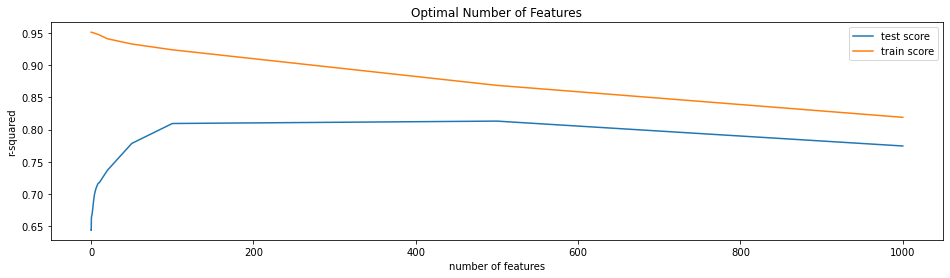

In [166]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [167]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-18239.39958873816


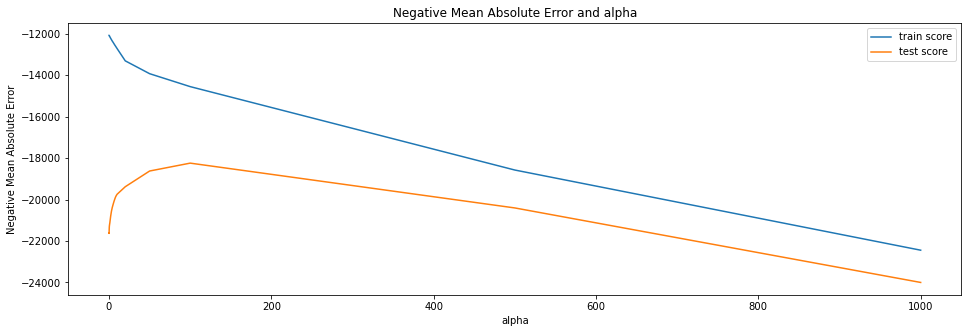

In [168]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [169]:
alpha = 100.0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100.0)

In [170]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9142608729736112


In [171]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [172]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8711428859077925


In [173]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 691422201.4057078


In [174]:
alpha = 100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(df_test_mod)
final_predictions = np.exp(preds)

<ipython-input-174-4b5a0abe089c>:7: RuntimeWarning: overflow encountered in exp
  final_predictions = np.exp(preds)


In [175]:
df_test_mod.index = df_test_mod.index + 1461

In [176]:
submission = pd.DataFrame({'Id': df_test_mod.index ,'SalePrice': final_predictions })

In [177]:
submission.to_csv("submission.csv",index=False)

In [178]:
## Using ridge

alpha = 10

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(df_test_mod)
final_predictions1 = np.exp(preds1)

<ipython-input-178-82ab48ee93cc>:9: RuntimeWarning: overflow encountered in exp
  final_predictions1 = np.exp(preds1)


In [179]:
submission1 = pd.DataFrame({'Id': df_test_mod.index ,'SalePrice': final_predictions1 })

In [180]:
submission1.to_csv("submission1.csv",index=False)